In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from SEIQR import SEIQR

# plt.style.use('seaborn-pastel')
# plt.style.use('dark_background')
plt.rcParams.update({'font.size': 23})
plt.rcParams['lines.linewidth'] = 3.5

In [5]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

## Setup

In [6]:
I0 = 10e-5
S0, E0, R0=0, 0, 0

beta_0 = 2.5
m_0 = 1
r0=(2/3)*beta_0*3*m_0

t0 = int((0.35+0.25+1.5)/0.005)-1

t_vec = np.arange(0, 100, 0.005)

r1 = SEIQR.transition(r0, 3.5, 2.5, 2.5 + 40/10, t_vec)


In [8]:
p =np.zeros(t_vec.shape[0])

t1=int(2.5/0.005)
p[:t1] = 0.05
p[t1:] = np.power(1 + np.exp(3-0.8*(np.arange(t_vec[t1], 100, 0.005)-t_vec[t1])), -1)*(0.425-0.04)
p[t1:] = (0.05 - p[t1]) + np.power(1 + np.exp(3-0.8*(np.arange(t_vec[t1], 100, 0.005)-t_vec[t1])), -1)*(0.425-0.04)

In [9]:
p[t1], p[0]

0.05

(0.0, 30.0)

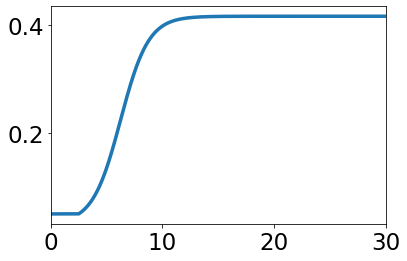

In [13]:
plt.plot(t_vec, p)
plt.xlim(0, 30)

## Baseline

In [15]:
base_prams=dict(
  beta= (2/3)*5/2, #r1
  m= 3*m_0,
  alpha= 0.005,
  gamma= 1,
  sigma= 0.35,#0.3,
  tau= 0.25,#0.2,
  kappa=1.5,
  rand='e',

  epsilon= lambda t, qp: 1,
  p= 0,
  
  delta=1,

  t_start=0, 
  dt=0.005,
  t_end=100,

  init=(S0, E0, I0, R0)
)

In [16]:
baseline=SEIQR(**base_prams)
baseline.run()

In [17]:
plt.rcParams.update({'font.size': 34})
def basline_plot(x):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,9), dpi=350)
  # ax1.axvline(x.t_vector[x.t0],c='k', alpha=0.2)
  ax1.plot(x.t_vector, x.S, label="S", c='b')
  ax1.plot(x.t_vector, x.E, label="E", c='orange')
  ax1.plot(x.t_vector, x.I, label="I", c='r')

  ax1.plot(x.t_vector, x.R, label="R", c='purple')


  title='SEIR Model with no control mechanisms.'
  fig.suptitle(title)

  ax1.set_xlabel('x 10 days')
  ax1.set_ylabel('population')
  ax1.legend(loc='upper right')

  ax2.plot(x.t_vector, x.I, label="I", c='r')
  ax2.plot(x.t_vector, x.E, label="E", c='orange')
 
  # ax2.axvline(x.t_vector[x.t0],c='k', alpha=0.2)
  ax2.set_xlabel('x 10 days')
  
  ax1.set_xlim(0, 80)
  ax2.set_xlim(0, 25)
  ax1.set_ylim(0)
  ax2.set_ylim(0, 0.4)

  ax2.legend(loc='upper right')
  # fig.tight_layout()
  fig.show()
  fig.savefig('fig1.tiff', format='tiff')

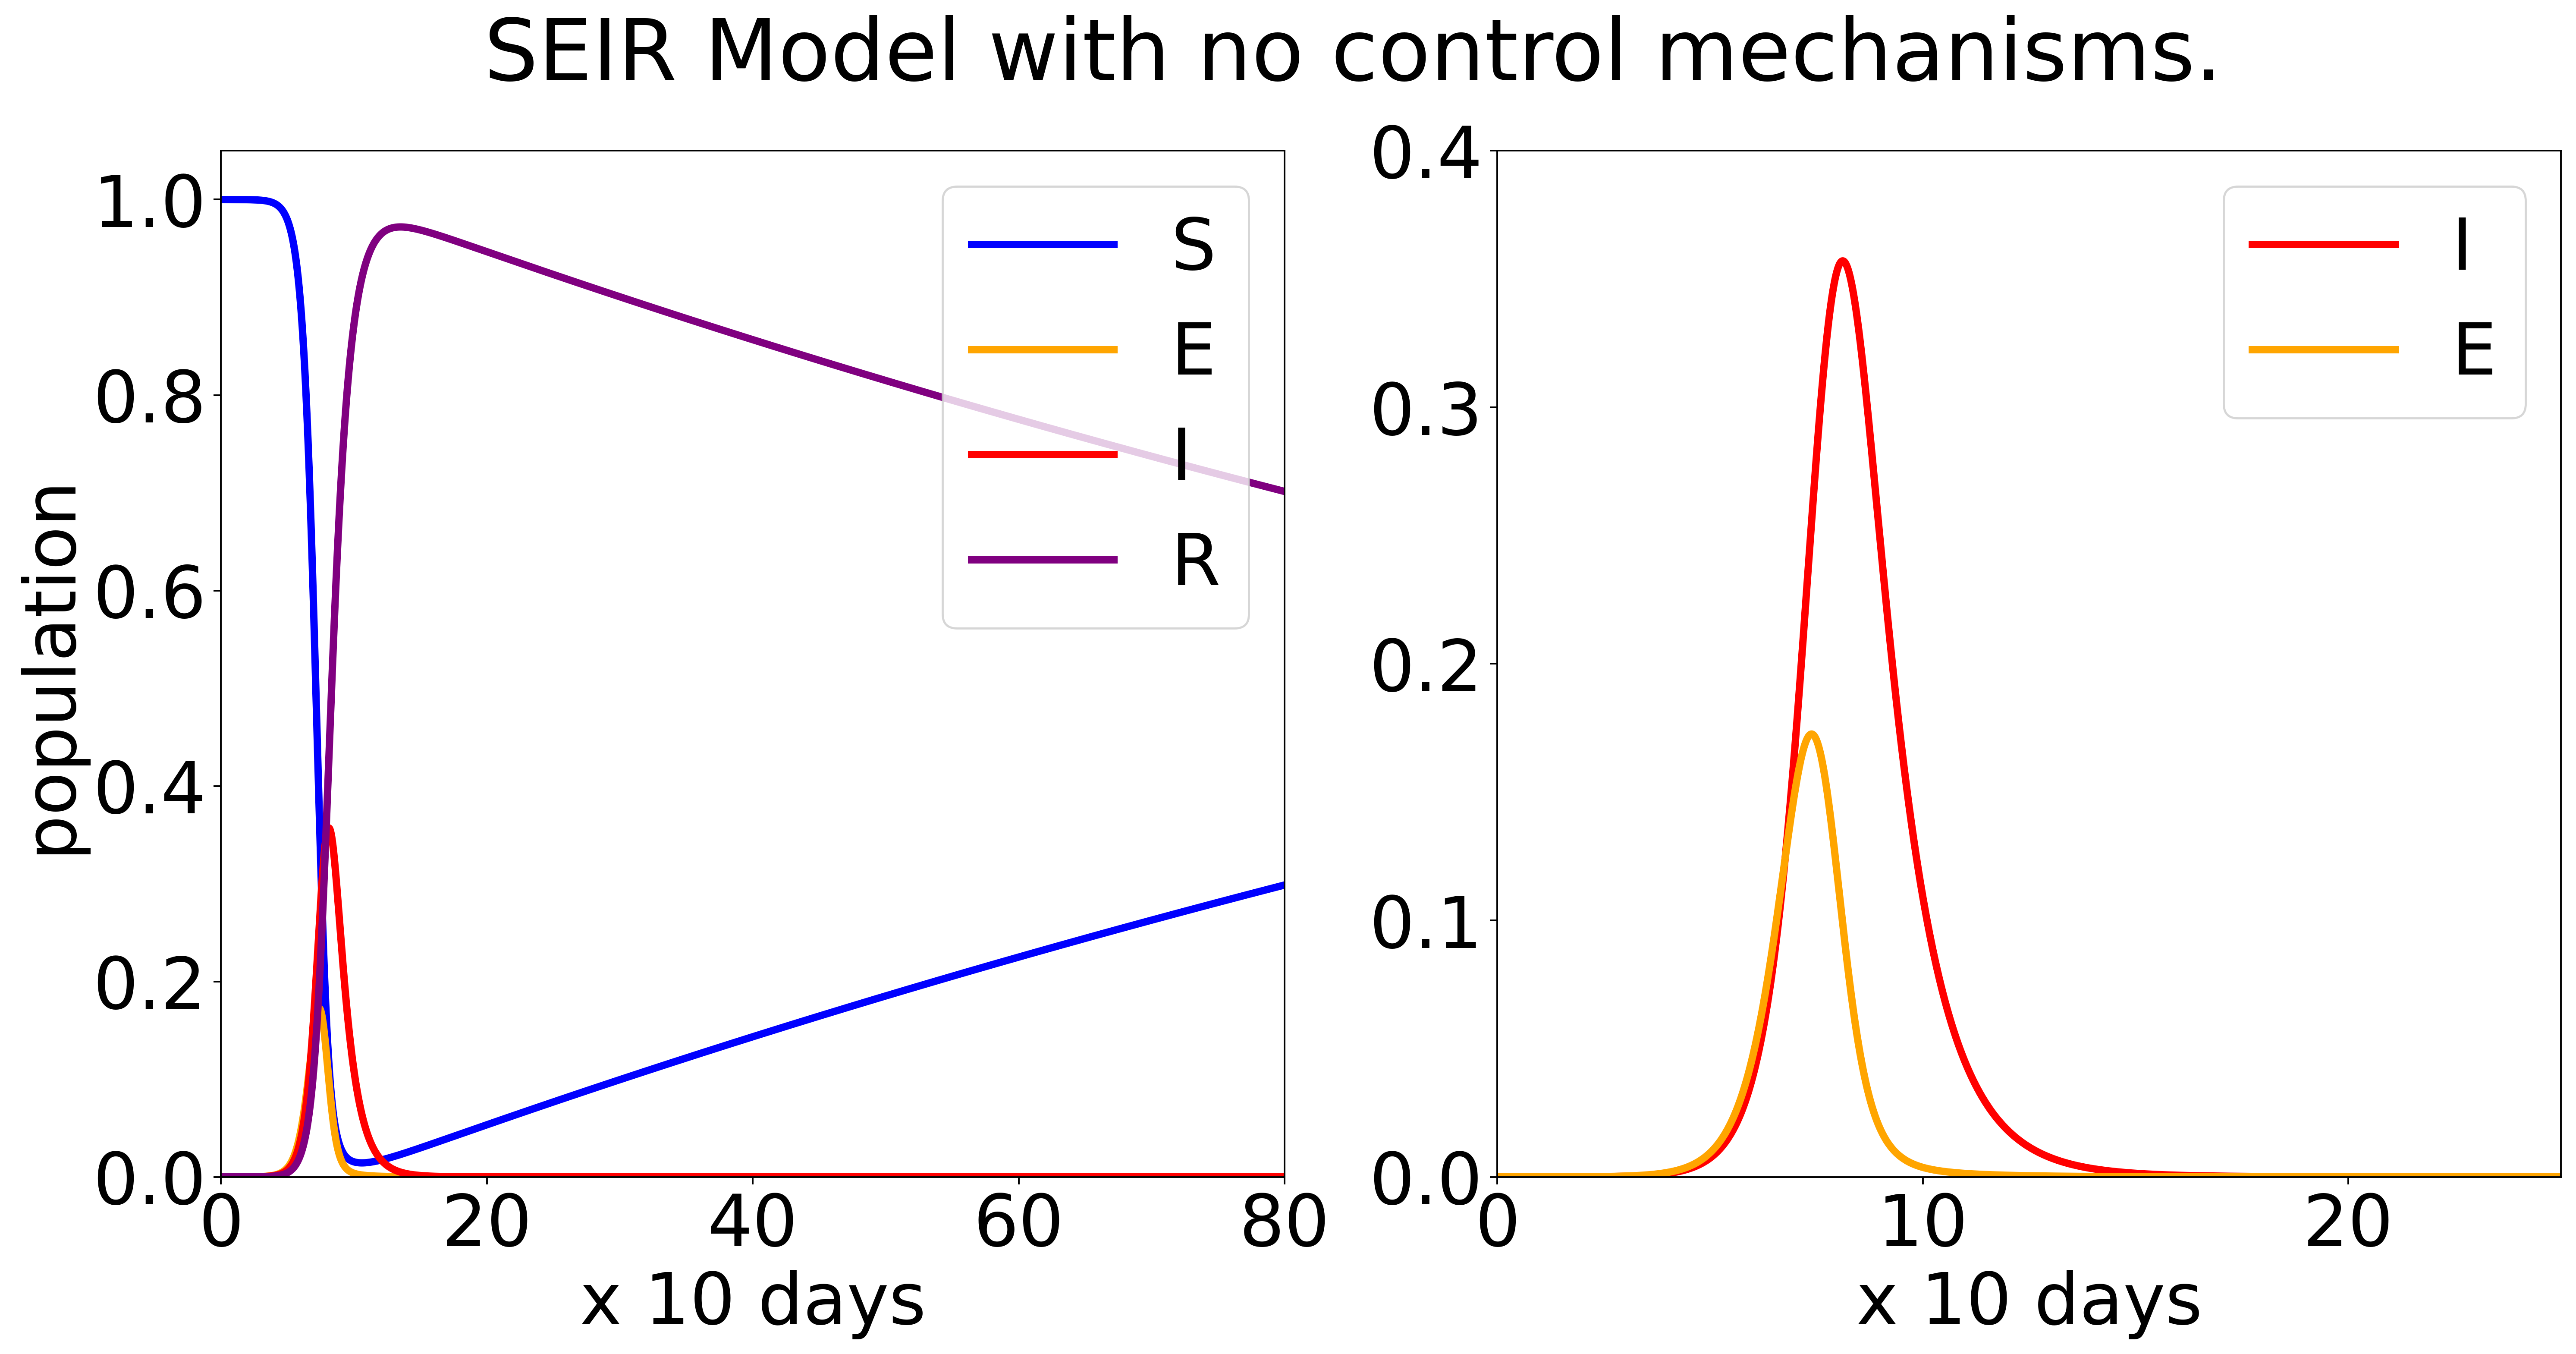

In [18]:
basline_plot(baseline)

## Initial Lockdown

In [19]:
lockNhold_prams=dict(
  beta= (2/3)*r1/2, 
  m= 3*m_0,
  alpha= 0.005,
  gamma= 1,
  sigma= 0.35,#0.3,
  tau= 0.25,#0.2,
  kappa=1.5,
  rand='a',

  epsilon= lambda t, qp: 1,
  p= p,

  d_func=lambda t, r, qp, q: 0.3 if np.max(qp)>0.002 else 1,
  d_param='Q+',

  t_start=0, 
  dt=0.005,
  t_end=100,

  init=(S0, E0, I0, R0)
)

In [20]:
lockNhold=SEIQR(**lockNhold_prams)
lockNhold.run()

In [21]:
# @markdown initial_lock_plot

def initial_lock_plot(x):
  plt.rcParams.update({'font.size': 34})
  fig, (ax2) = plt.subplots(1, 1, figsize=(10,8), dpi=500)
  plt.rcParams.update({'font.size': 30})
  title='Effect of measures taken to contain the outbreak'# including lockdown'
  fig.suptitle(title)

  ax2.plot(x.t_vector, x.I, label="I", c='r')
  ax2.plot(x.t_vector, x.E, label="E", c='orange')
  ax2.plot(x.t_vector, x.Q, label="Q", c='k')
  # ax2.plot(x.t_vector[x.t0:], x.Qp[x.t0:], label="Q+", c='k', linestyle='dashed')
  # ax2.axvline(x.t_vector[x.t0],c='k', alpha=0.2)
  # ax2.axvline(x.t_vector[np.where(x.delta<1)[0][0]],c='g', alpha=0.4)
  ax2.axvline(2.5, c='green', linestyle='dashed', alpha=0.6, label='$t_1$') 
  ax2.axvline(x.t_vector[np.where(x.delta<1)[0][0]], c='green', alpha=0.6, label='$t_2$') 
  


  ax2.set_xlabel('x 10 days')
  # ax2.yaxis.set_ticks(np.arange(0, 0., 0.1))
  ax2.set_xlim(0, 25)

  ax2.set_ylim(0, 0.02)
  ax2.legend(loc='upper right')
  fig.tight_layout()
  fig.show()
  fig.savefig('fig2.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


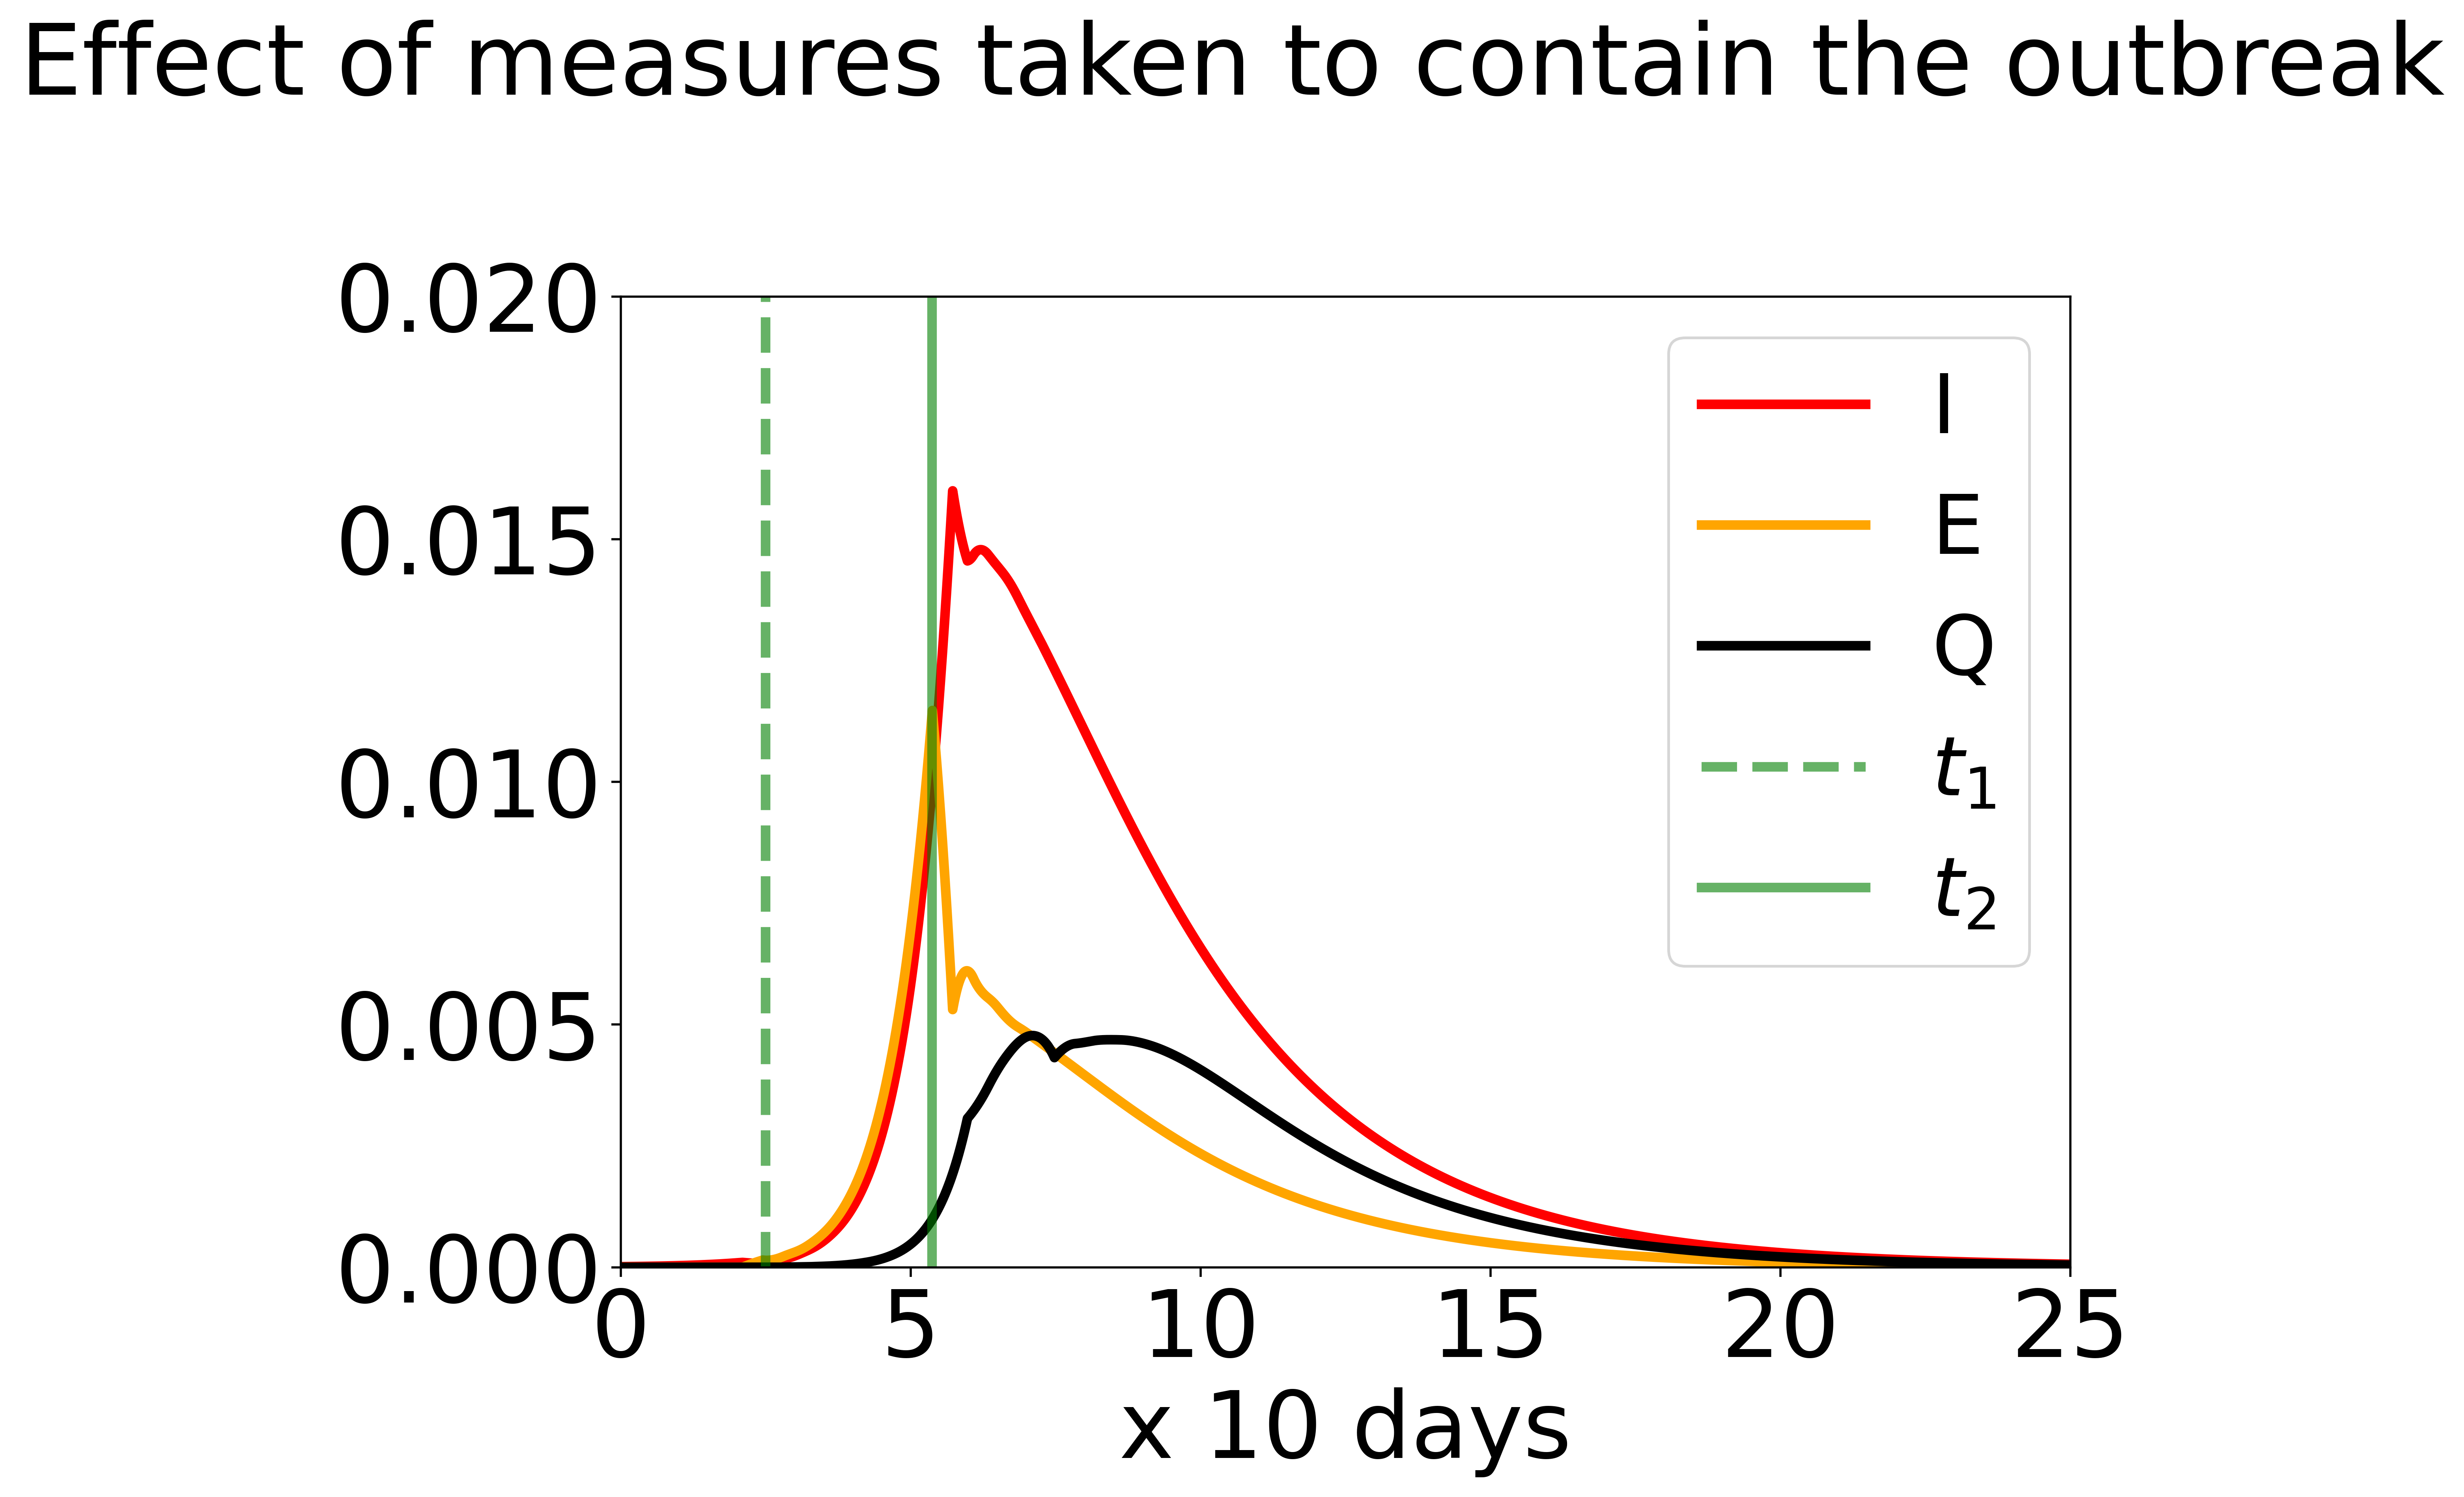

In [22]:
initial_lock_plot(lockNhold)

In [ ]:
np.max(lockNhold.I)

0.01599536494207903

In [23]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

In [84]:
# @markdown Singularity Analysis
def singularity_analysis(x):
  plt.rcParams['lines.linewidth'] = 2
  id=np.where(x.delta<1)[0][0]
  tdrop = x.t_vector[id]

  ie=np.where(x.E==np.max(x.E[:int(5.5/x.dt)]))[0][0]
  temax, emax = x.t_vector[ie], x.E[ie]

  iqp=np.where(x.Qp==np.max(x.Qp[:int(6/x.dt)]))[0][0]
  tqpmax, qpmax = x.t_vector[iqp], x.Qp[iqp]

  iqp2=np.where(x.Qp==np.max(x.Qp[iqp+1:int(6.4/x.dt)]))[0][0]
  tqpmax2, qpmax2 = x.t_vector[iqp2], x.Qp[iqp2]

  ii=np.where(x.I==np.max(x.I[:iqp]))[0][0]
  timax, imax = x.t_vector[ii], x.I[ii]

  iq=np.where(x.Q==np.max(x.Q[:int(15/x.dt)]))[0][0]
  tqmax, qmax = x.t_vector[iq], x.Q[iq]

  out = [i if i <lockNhold.Q.shape[0]-1 and lockNhold.Q[i-1]>v and lockNhold.Q[i+1]>v else None for i, v in enumerate(lockNhold.Q)]
  for i, v in enumerate(lockNhold.Q):
    if i <lockNhold.Q.shape[0]-1 and lockNhold.Q[i-1]>v and lockNhold.Q[i+1]>v:
      iqm=i
      break
  tqmin, qmin = x.t_vector[iqm], x.Q[iqm]


  ip=np.where(x.p==np.max(x.p))[0][0]
  tpmax, pmax = x.t_vector[ip], x.p[ip]


  fig, ax =plt.subplots(figsize=(20, 8))
  # fig.patch.set_facecolor('#000000')
  ax.step(x.t_vector, x.E, 'orange', label='E')
  ax.step(x.t_vector, x.I, 'r', label='I')
  ax.step(x.t_vector, x.Q, 'k', label='Q')
  ax.step(x.t_vector, x.Qp, 'k--', label='$Q^+$')


  # ax.set_xlim(1, 20)
  ax.set_xlim(2, 10)
  ax.set_ylim(0, 0.019)

  ax.scatter([temax, timax, tqpmax, tqpmax2], [emax, imax, qpmax, qpmax2], s=500, facecolors='none', edgecolors=['orange', 'r', 'k', 'k', 'k'], )
  ax.annotate('1', xy=(4.8, 0.005), xytext=(temax-0.2, 0.01))
  ax.annotate('2', xy=(4.8, 0.005), xytext=(timax - 0.2, 0.014))
  ax.annotate('3', xy=(4.8, 0.005), xytext=(tqpmax +0.1, 0.0065))
  ax.annotate('4', xy=(4.8, 0.005), xytext=(tqpmax2 -0.15, 0.004))
  # ax.annotate('5', xy=(4.8, 0.005), xytext=(tqmin -0.15, 0.0055))
  ax.axvline(temax, c='orange', alpha=0.6)
  ax.axvline(timax, c='r', alpha=0.6)
  # ax.axvline(tqmin, c='k', alpha=0.6)
  ax.axvline(tqpmax, c='k', linestyle='dashed', alpha=0.6) 
  ax.axvline(tqpmax2, c='k', linestyle='dashed', alpha=0.6) 
  # ax.axvline(5, c='blue', linestyle='dashed', alpha=1, label='linear p') 
  # ax.axhline(0.007, c='r', linestyle='dashed', alpha=0.8, label='$Q^+_{max}$') 
  # ax.axvline(x.t_vector[x.t0],c='k', alpha=0.6, label='$t_1$')
  ax.axvline(2.5, c='green', linestyle='dashed', alpha=0.6, label='$t_1$') 
  ax.axvline(tdrop, c='green', alpha=0.6, label='$t_2$') 
  
  
  plt.rcParams.update({'font.size': 18})
  temp=round((timax-temax)/x.sigma, 3)
  if temp==1:
    ax.annotate('---$\\sigma$---', xy=(x.t_vector[ie], 0.013), xytext=(x.t_vector[ie], 0.017))
  temp=round((tqpmax-timax)/x.tau, 2)
  if temp==1:
    ax.annotate('--$\\tau$--', xy=(4.8, 0.005), xytext=(x.t_vector[ii], 0.0165))
  temp = round((tqpmax2 - tqpmax)/(x.sigma), 1)
  if temp==1:
    ax.annotate('---$\\sigma$---', xy=(5, 0.01), xytext=(tqpmax, 0.017))
  plt.rcParams.update({'font.size': 23})
  ax.set_xlabel('x 10 days')
  ax.legend(loc='upper left', bbox_to_anchor=(0.07, 1))


  ax2 = fig.add_axes([0.7,0.58,0.22,0.42])

  ax2.plot(t_vec, p, 'b', label='p')
  ax2.xaxis.set_ticks(np.arange(0, 30, 5))
  ax2.set_xlim(0, 25)
  ax2.legend(loc='lower right')



  fig.suptitle('Singularity Analysis')

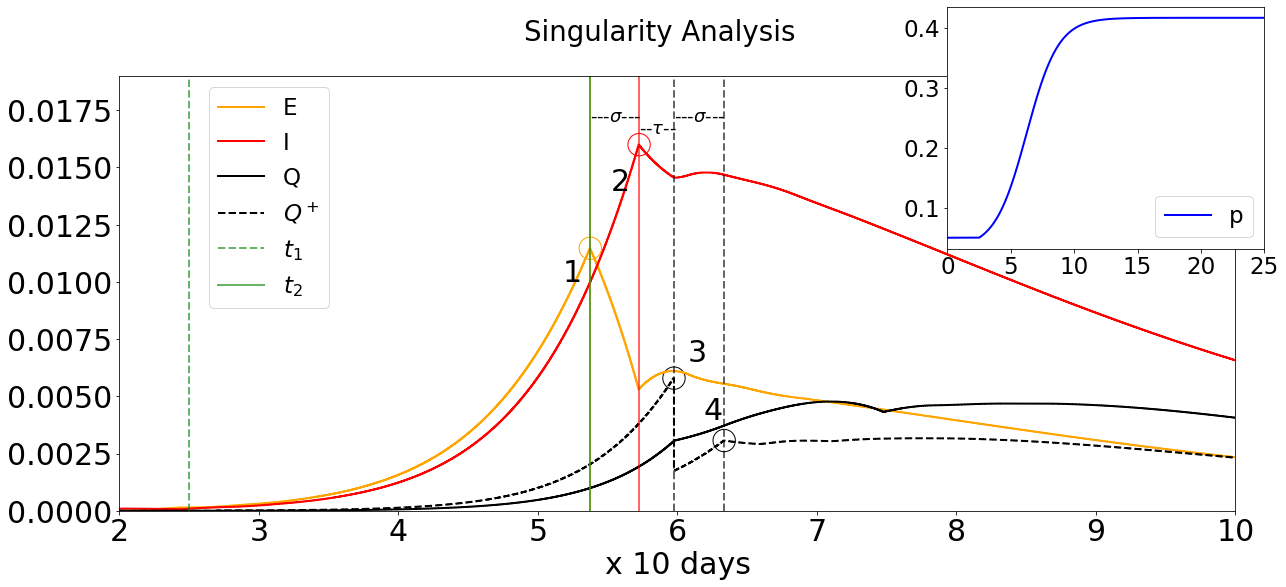

In [85]:
singularity_analysis(lockNhold)

## Steering


In [36]:
steer_smol_prams = dict(
  beta= (2/3)*r1/2,
  m= 3*m_0,
  alpha= 0.005,
  gamma= 1,
  sigma= 0.35,#0.3,
  tau= 0.25,#0.2,
  epsilon= lambda t, qp: 1,
  p= p, 
  kappa=1.5,
  d_param='straight',
  steer_value= 0.001,
  d_func = 1.003,
  r1=r1,
  rand='a',
  sett = False,

  t_start=0, 
  dt=0.005,
  t_end=100,

  init=(S0, E0, I0, R0)
)
steer_smol=SEIQR(**steer_smol_prams)
steer_smol.run()

steer_smol_hiprams = steer_smol_prams
steer_smol_hiprams['d_func'] = 1.02
steer_smol_hi=SEIQR(**steer_smol_hiprams)
steer_smol_hi.run()

steer_smol_loprams = steer_smol_prams
steer_smol_loprams['d_func'] = 0.98
steer_smol_lo=SEIQR(**steer_smol_loprams)
steer_smol_lo.run()

steer_big_prams = steer_smol_prams
steer_big_prams['d_func'] = 1
steer_big_prams['steer_value'] = 0.002
steer_big=SEIQR(**steer_big_prams)
steer_big.run()

set
set
set
set
set


In [40]:
#@title steering plots

def dual(hi, x):
  title='2% above steering formula'
  plt.rcParams.update({'font.size': 20})
  fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(25,8))

  ax1.plot(hi.t_vector, hi.I, label="I", c='r')
  ax1.plot(hi.t_vector, hi.E, label="E", c='orange')
  ax1.plot(hi.t_vector, hi.Q, label="Q", c='k')
  ax1.plot(hi.t_vector[hi.t0:], hi.Qp[hi.t0:], label="Q+", c='k', linestyle='dashed', linewidth=2.5)
  ax1.axhline(hi.steer_value, c='b', linestyle='dashed', alpha=0.4)
  ax1.axvline(hi.t_vector[np.where(hi.delta<1)[0][0]],c='g', alpha=0.4)
  ax1.set_xlabel('x 10 days')
  ax1.set_xlim(0, 80)
  ax1.set_ylim(0, 0.01)
  ax1.legend(loc='upper right')
  ax1.set_title(title)

  title='2% below steering formula'
  ax2.plot(x.t_vector, x.I, label="I", c='r')
  ax2.plot(x.t_vector, x.E, label="E", c='orange')
  ax2.plot(x.t_vector, x.Q, label="Q", c='k')
  ax2.plot(x.t_vector[x.t0:], x.Qp[x.t0:], label="Q+", c='k', linestyle='dashed', linewidth=2.5)
  ax2.axhline(x.steer_value, c='b', linestyle='dashed', alpha=0.4)
  ax2.axvline(x.t_vector[np.where(x.delta<1)[0][0]],c='g', alpha=0.4)
  ax2.set_xlabel('x 10 days')
  ax2.set_xlim(0, 80)
  ax2.set_ylim(0, 0.01)
  ax2.legend(loc='upper right')
  ax2.set_title(title)
  fig.show()

def steer_smol_plot(x, hi=False, lo=False):
  plt.rcParams.update({'font.size': 34})
  fig, ax1 = plt.subplots(1, 1, figsize=(12,12))
  fig1, ax2 = plt.subplots(1, 1, figsize=(12,12))
  fig2, ax3 = plt.subplots(1, 1, figsize=(12,12))
  ax1.plot(x.t_vector, x.S, label="S", c='b')
  ax1.plot(x.t_vector, x.E, label="E", c='orange')
  ax1.plot(x.t_vector, x.I, label="I", c='r')
  ax1.plot(x.t_vector, x.R, label="R", c='purple')  
  title='Steering to balance infection\nand activity upon reopening'
  ax1.set_xlabel('x 10 days')
  ax1.set_ylabel('population')
  ax1.legend(loc='upper right')
  

  ax2.plot(x.t_vector, x.I, label="I", c='r')
  ax2.plot(x.t_vector, x.E, label="E", c='orange')
  ax2.plot(x.t_vector, x.Q, label="Q", c='k')
  ax2.plot(x.t_vector[x.t0:], x.Qp[x.t0:], label="Q+", c='k', linestyle='dashed', linewidth=3)
  # ax2.axvline(x.t_vector[x.t0],c='k', alpha=0.2)
  ax2.axhline(x.steer_value, c='b', linestyle='dashed', alpha=0.4)
  ax2.axvline(x.t_vector[np.where(x.delta<1)[0][0]],c='g', alpha=0.4)
  # ax1.set_title('(a)')
  # ax2.set_title('(b)')
  # ax3.set_title('(c)')
  ax2.set_xlabel('x 10 days')
  ax3.set_xlabel('x 10 days')
  
  ax1.set_xlim(0, 80)
  ax1.set_ylim(0, 1)
  ax2.set_xlim(0, 80)
  ax2.set_ylim(0, 0.01)
  # ax3.set_ylim(0)
  ax3.set_xlim(0, 80)
  ax2.legend(loc='upper right')

  r1 = x.m*x.beta
  r2 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
  r3 = np.multiply(r2, (1 - x.R - x.Q))
  r4 = np.multiply(r3, x.epsilon_history)
  
  ax3.plot(x.t_vector[:-1], r4[:-1], label="$r_{eff}$", c='slateblue')
  ax3.tick_params(axis='y', labelcolor='slateblue')
  # ax3.plot(x.t_vector[:-1], x.p[:-1], label="$p$", c='blue')
  ax5 = ax3.twinx()
  ax5.step(x.t_vector[:-1], x.delta[:-1], label="$\\delta$", c='g')
  ax5.tick_params(axis='y', labelcolor='g')
  ax3.set_ylim(-0.15, 5.15)
  ax5.set_ylim(-0.05, 1.05)
  ax3.legend(loc='lower left')
  ax5.legend(loc='lower right')
  fig1.suptitle(title)

  fig.show()
  fig1.show()
  fig2.show()

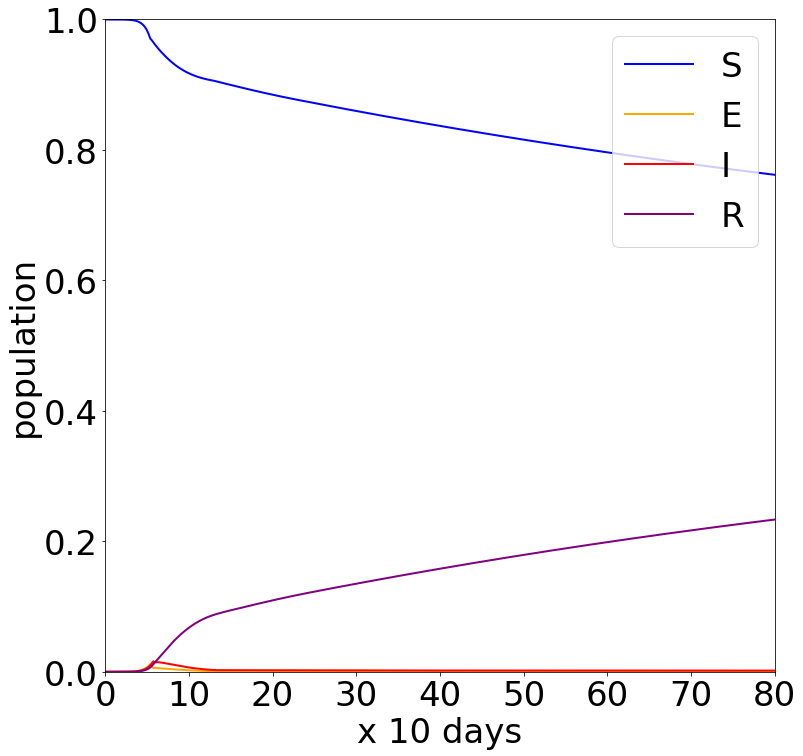

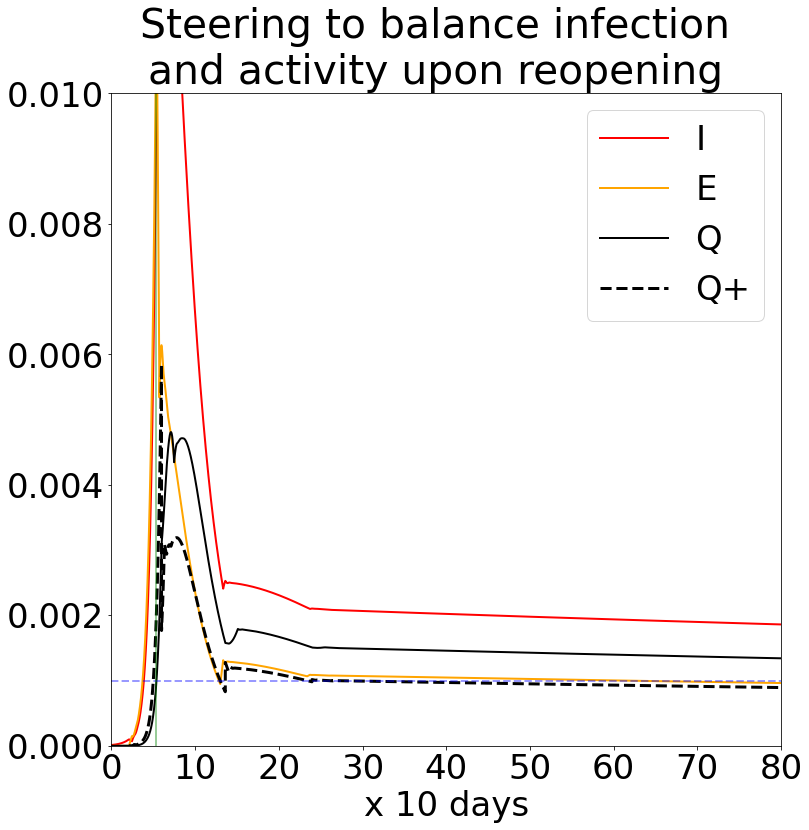

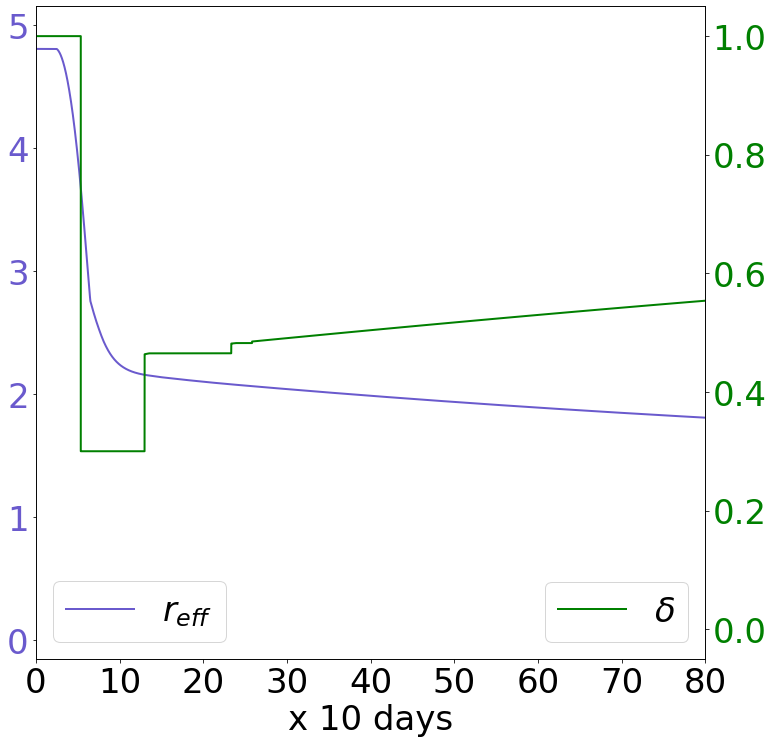

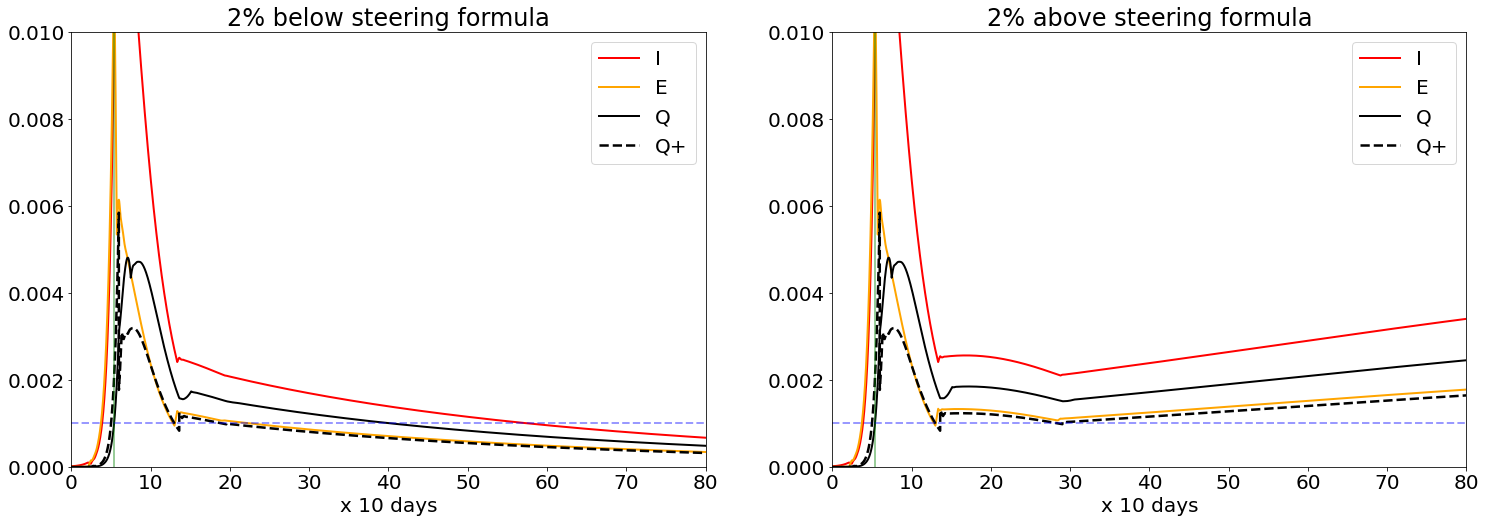

In [42]:
steer_smol_plot(steer_smol)
dual(steer_smol_hi,steer_smol_lo)


## Stamping

### contact tracing

In [43]:
qpos = []
dos = []
cc=[]
ef = []
eps = []

r2 = np.multiply(r1, (1 - p*np.exp(-0.25)))

for qpo in [i/100000 for i in range(1, 15)]:
  test=dict(
    beta= (2/3)*r1/2,
    m= 3*m_0,
    alpha= 0.005,
    gamma= 1,
    sigma= 0.35,
    epsilon= lambda t, qp: 1 if t<10 else 1 - 0.5*SEIQR.contact_curve(qp),
    p= p,
    tau= 0.25,
    kappa=1.5,
    d_param='delta_open',
    d_func = 1,
    delta_o=1,
    dld = 0.3,
    qpo=qpo,
    rand='a',

    t_start=0, 
    dt=0.005,
    t_end=100,

    init=(S0, E0, I0, R0)
  )
  x=SEIQR(**test)
  x.run()

  iopen = np.where(x.delta[1:]>x.delta[:-1])[0][0]
  r4 = r2*(1 - 0.5*SEIQR.contact_curve(qpo))
  cc.append(SEIQR.contact_curve(qpo))
  qpos.append(qpo)
  dos.append(1/r4[iopen])

  ef.append(r4[iopen])
  eps.append(x.Ep[iopen])



Text(0.5, 1.0, 'Activity Capacity by Daily Positive Cases at Opening')

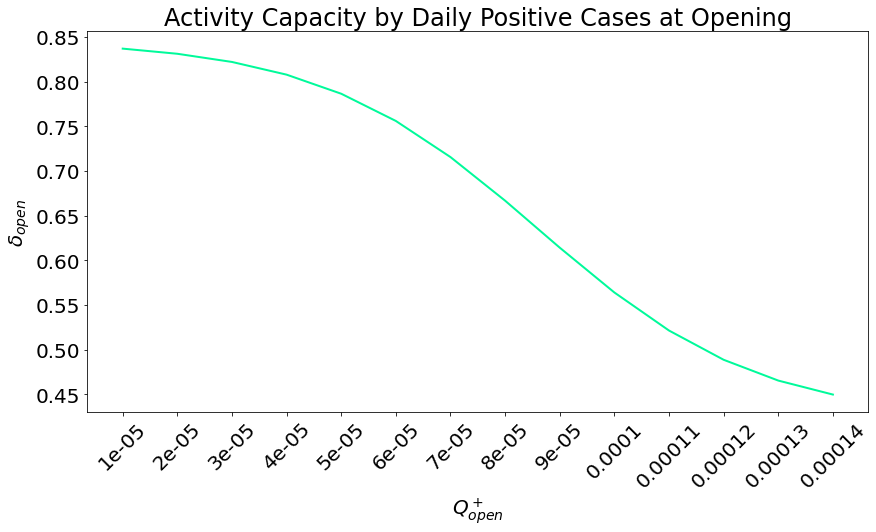

In [44]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(qpos, dos, 'mediumspringgreen', label='$\delta_{open}$')
ax.set_ylabel('$\delta_{open}$')
ax.set_xlabel('$Q^+_{open}$')
ax.set_xticks(qpos)
ax.set_xticklabels(qpos, rotation=45)
ax.set_title('Activity Capacity by Daily Positive Cases at Opening')

Text(0.5, 1.0, 'r_eff by Daily Positive Cases at Opening')

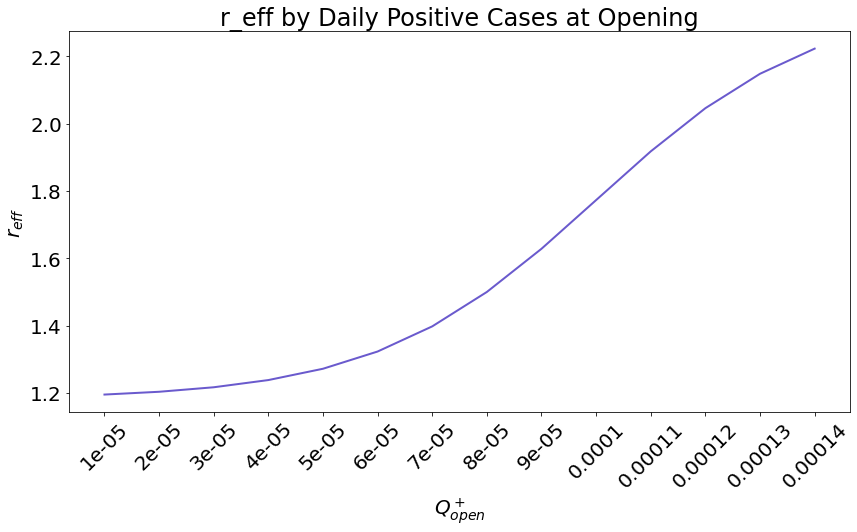

In [45]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(qpos, ef, 'slateblue', label='$r_{eff}$')
ax.set_ylabel('$r_{eff}$')
ax.set_xlabel('$Q^+_{open}$')
ax.set_xticks(qpos)
ax.set_xticklabels(qpos, rotation=45)
ax.set_title('r_eff by Daily Positive Cases at Opening')

Text(0.5, 1.0, '$E^+$ by Daily Positive Cases at Opening')

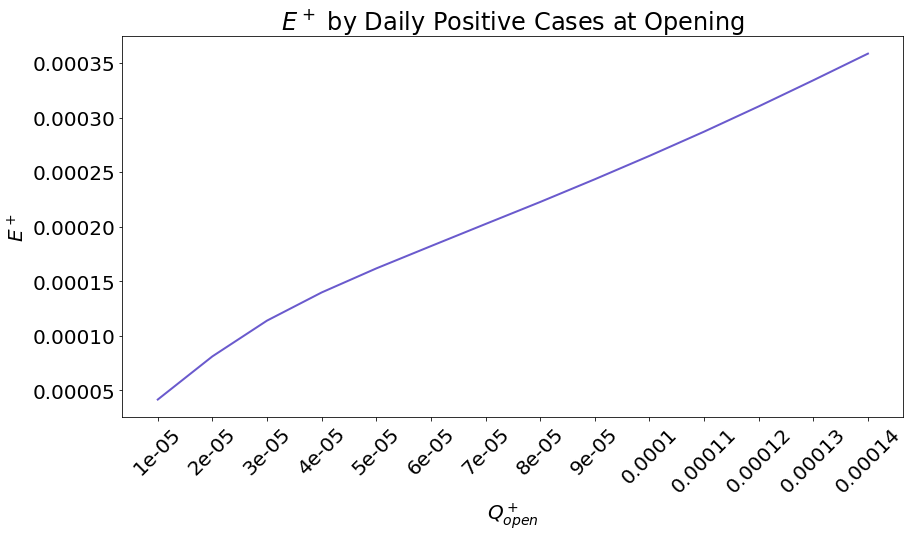

In [46]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(qpos, eps, 'slateblue', label='$E^+$')
ax.set_ylabel('$E^+$')
ax.set_xlabel('$Q^+_{open}$')
ax.set_xticks(qpos)
ax.set_xticklabels(qpos, rotation=45)
ax.set_title('$E^+$ by Daily Positive Cases at Opening')

### figs

In [47]:
model2s=[]
for qpo in [0.00001]*19:
  test=dict(
    beta= (2/3)*r1/2,
    m= 3*m_0,
    alpha= 0.005,
    gamma= 1,
    sigma= 0.35,#0.3,
    tau= 0.25,#0.2,
    epsilon= lambda t, qp: 1 if t<10 else 1 - 0.5*SEIQR.contact_curve(qp),
    p= p,
    kappa=1.5,
    d_param='delta_open',
    d_func = 1,
    delta_o=0.9,
    dld=0.3,
    qpo=qpo,
    r1=r1,
    # rand='manual',
    rand='e',
  
    t_start=0, 
    dt=0.005,
    t_end=100,

    init=(S0, E0, I0, R0)
  )
  x=SEIQR(**test)
  x.run()
  model2s.append(x)

In [48]:
#@title stoch_plot

def stoch_plot(x):
  fig, ax1 = plt.subplots(1, 1, figsize=(20,8))
  plt.rcParams.update({'font.size': 25})
  start = x.t_vector[np.where(x.delta[1:]>x.delta[:-1])[0][0]] - 0.5
  dstart = np.where(x.delta[1:]>x.delta[:-1])[0][0]
  end = int(80/x.dt)
  ax1.step(10*x.t_vector-start, 10e6*x.n_history, 'r', label='$X$')
  ax1.vlines(10*start+5, 0, 500, 'g', alpha=0.6, linewidth=1.4)
  ax1.set_xlim(10*start, 800)
  ax1.set_ylim(0, 300)
  ax1.legend(loc='lower right')
  ax1.set_xlabel('days')
  ax1.set_ylabel('# of cases')

  big_day = np.argmax(x.n_history[dstart:end])
  big = 10e6*x.n_history[dstart + big_day]

  ivec=np.arange(dstart + big_day-int(0.5/x.dt),dstart +big_day+int(5/x.dt), 20)
  tvec=[10*x.t_vector[i]-start for i in ivec]


  qp = np.asarray([10e6*x.dt*np.sum(x.Qp[i:i+20]) for i in ivec])

  ax2 = fig.add_axes([0.73,0.53,0.2,0.45])
  ax2.set_xlim(tvec[0]-1, tvec[-1]+1)

  ax2.bar(tvec, qp, label='Q+', color='k')
  ax2.axhline(qp[-1], color='slateblue', linestyle='dashed', linewidth=1.3)
  
  ax2.legend()
  ax1.indicate_inset([tvec[0], 0, 50, np.max([big, 250])], inset_ax=ax2, edgecolor='purple')


  iz = np.asarray([10e6*x.I[i] for i in ivec])
  ax3 = fig.add_axes([0.45,0.53,0.2,0.45])
  ax3.set_xlim(tvec[0]-1, tvec[-1]+1)
  ax3.set_ylim(bottom=0.6*np.min(iz), top=1.1*np.max(iz))

  ax3.bar(tvec, iz, label='I', color='lightcoral')
  
  ax3.legend()
  ax1.indicate_inset([tvec[0], 0, 50, np.max([big, 250])], inset_ax=ax3, edgecolor='purple')

  fig.show()

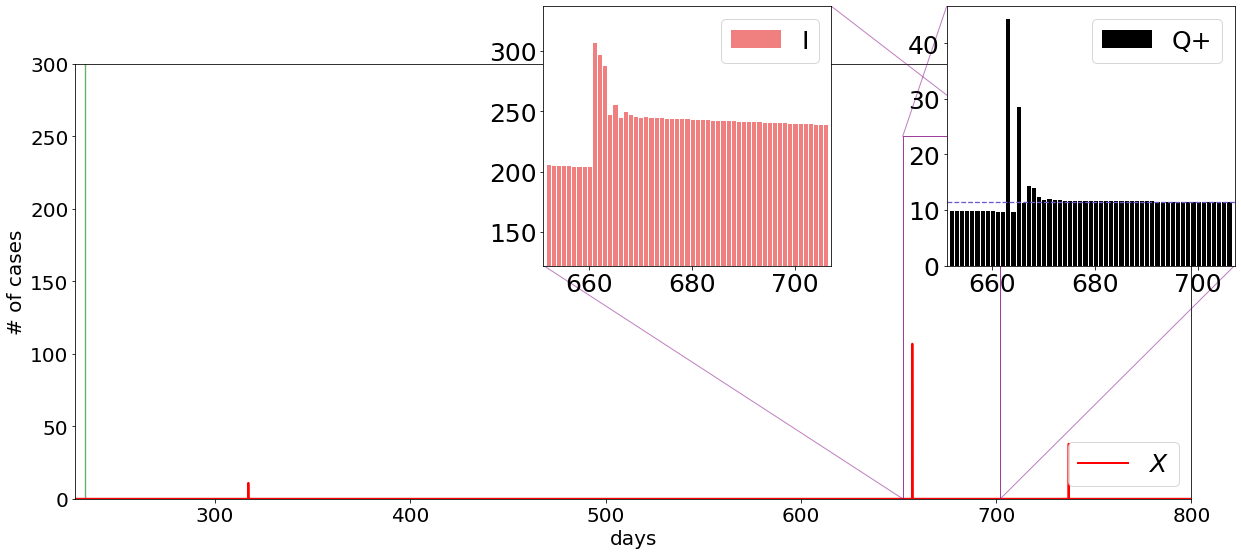

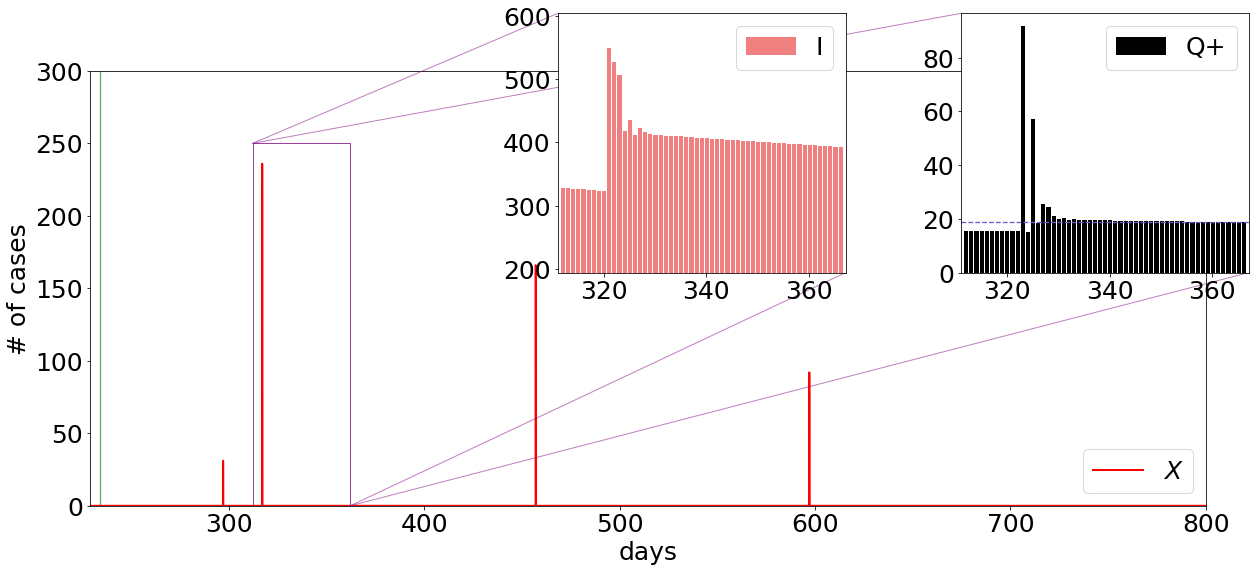

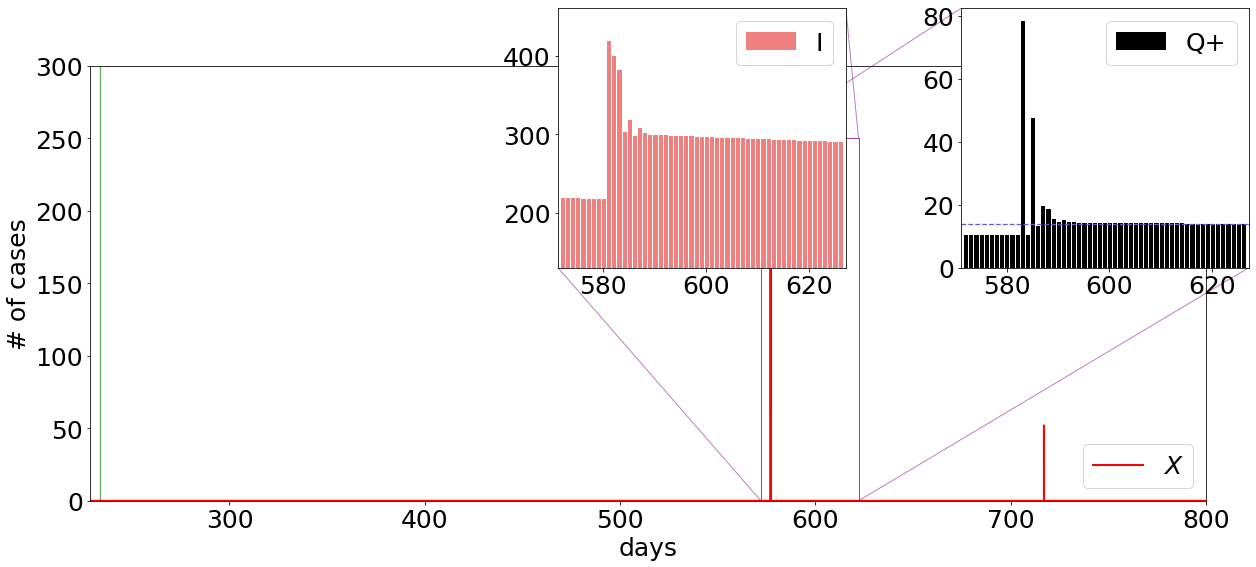

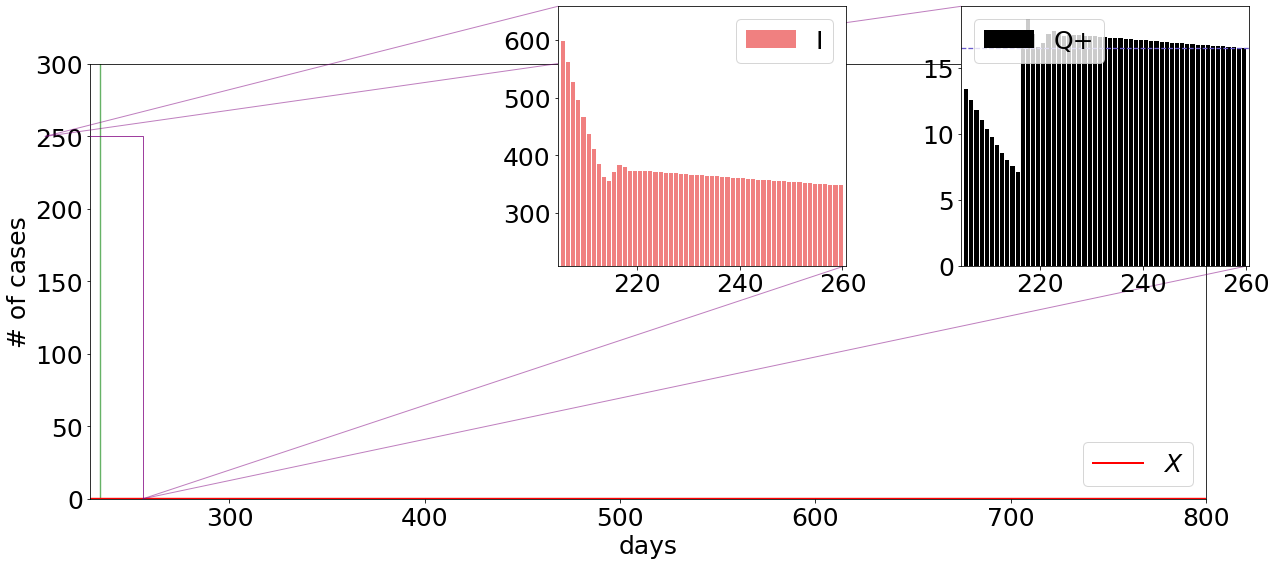

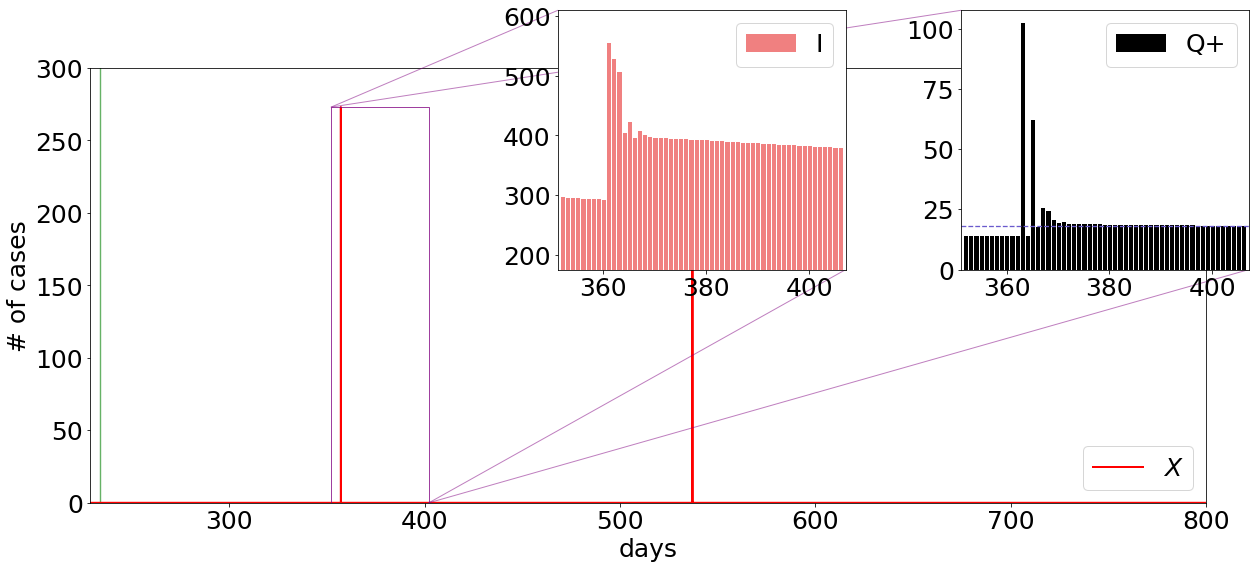

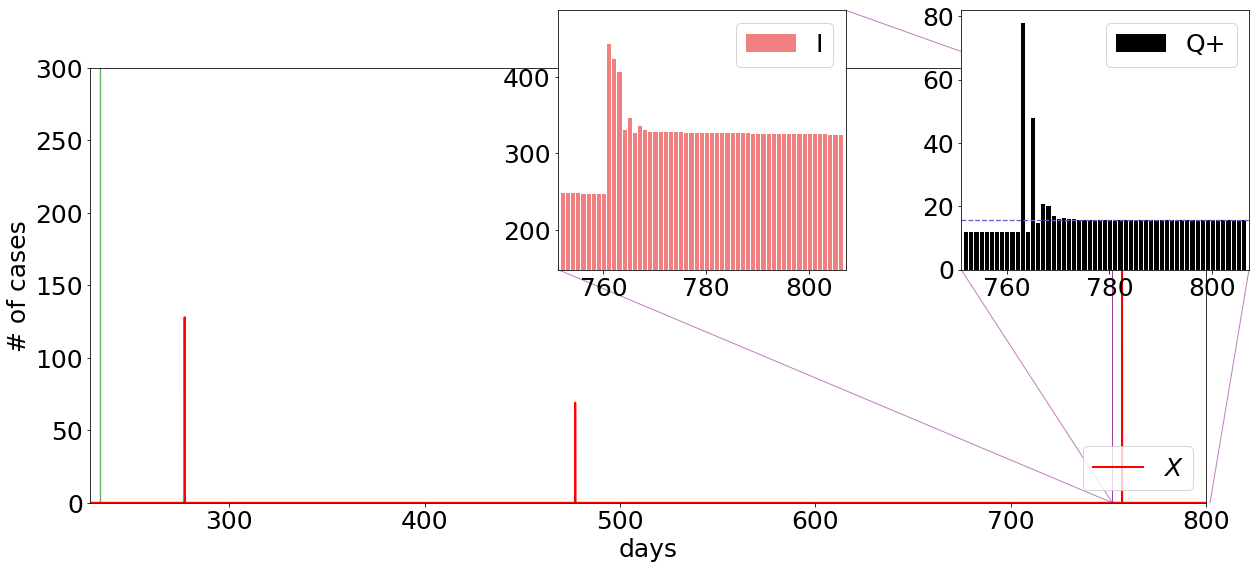

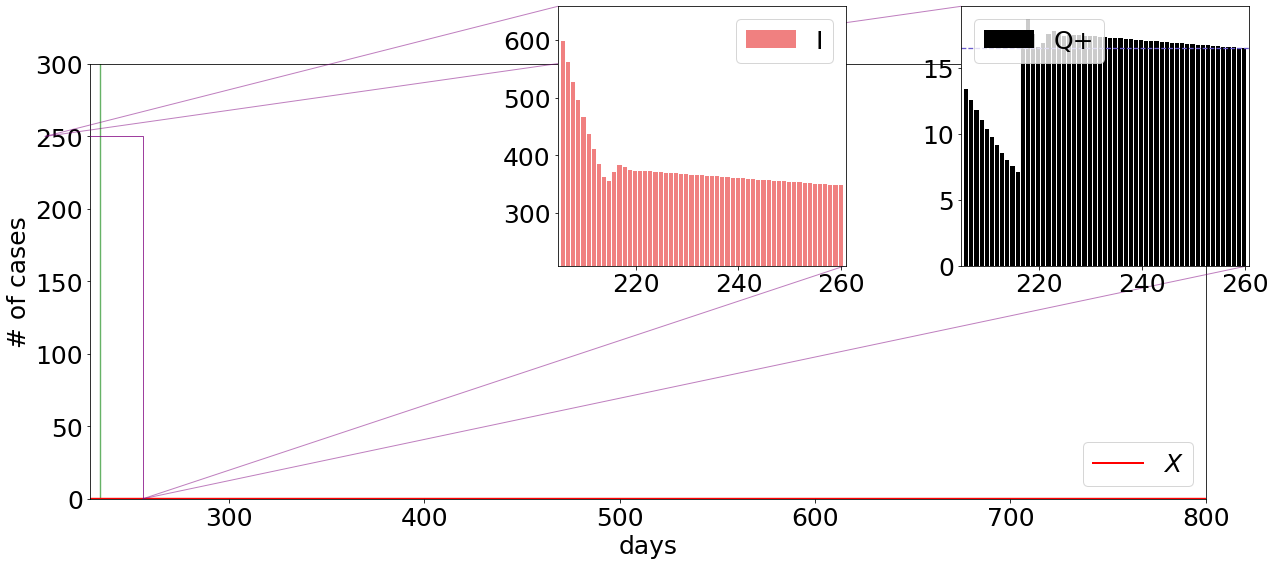

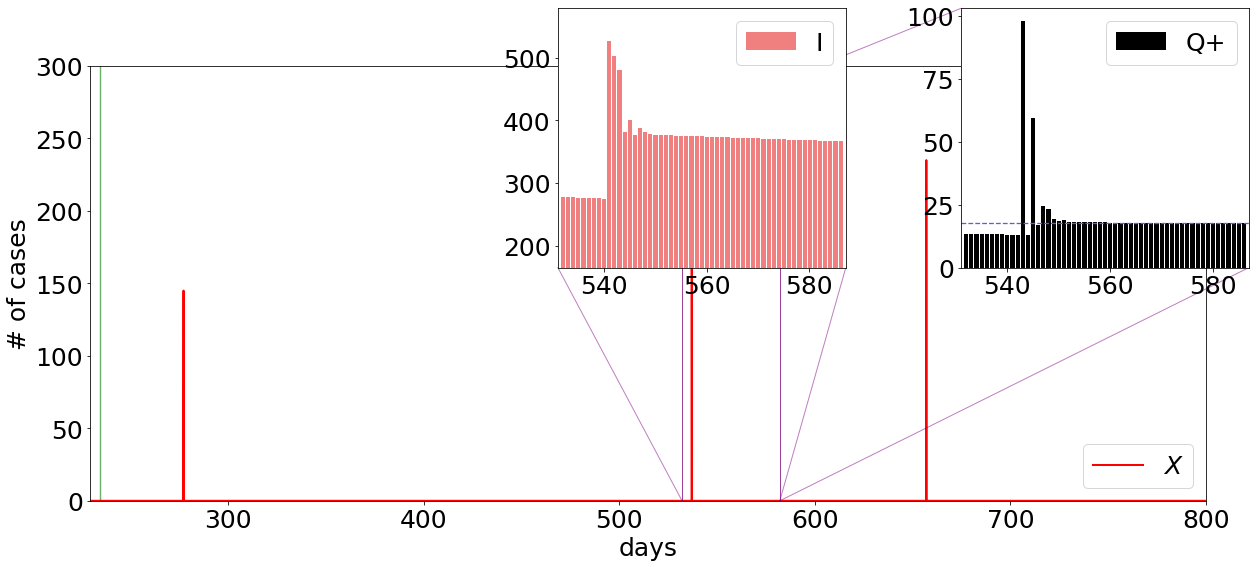

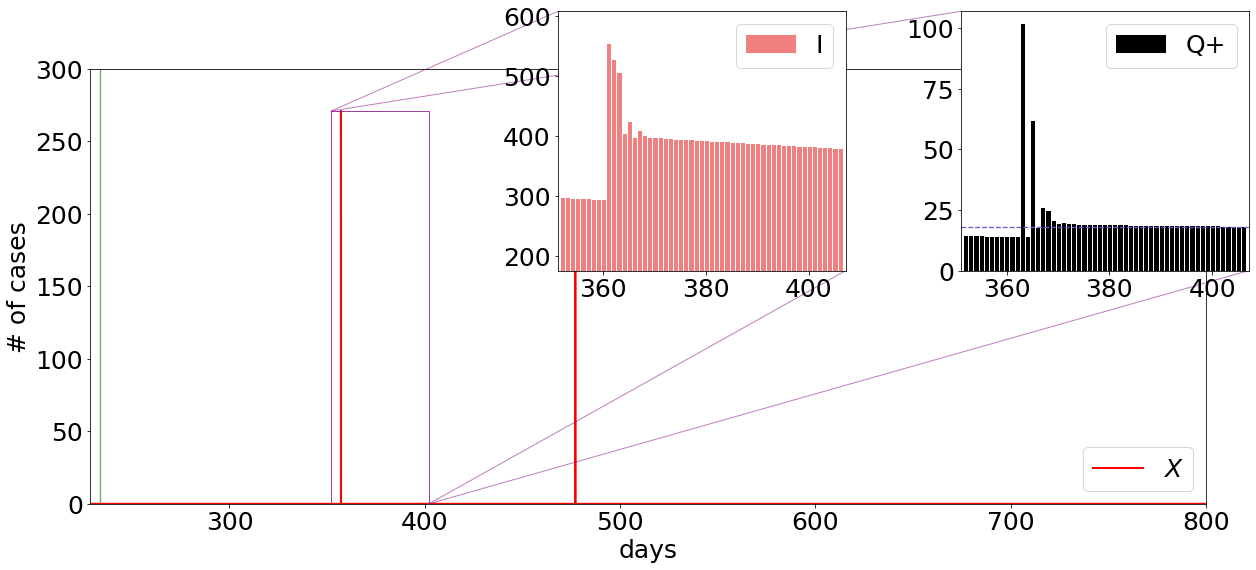

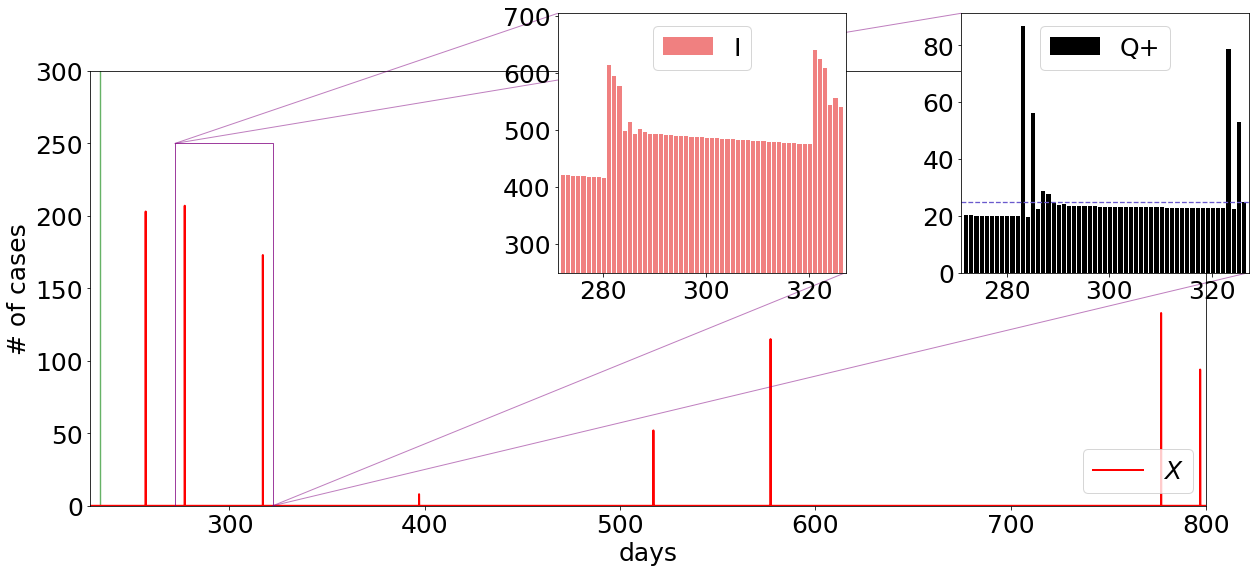

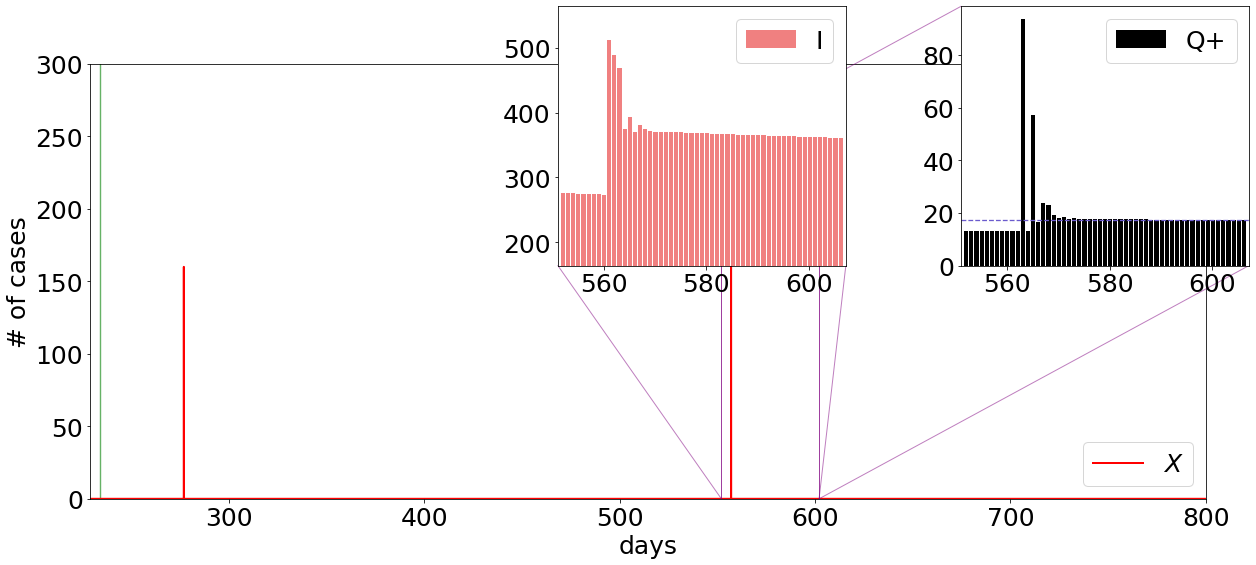

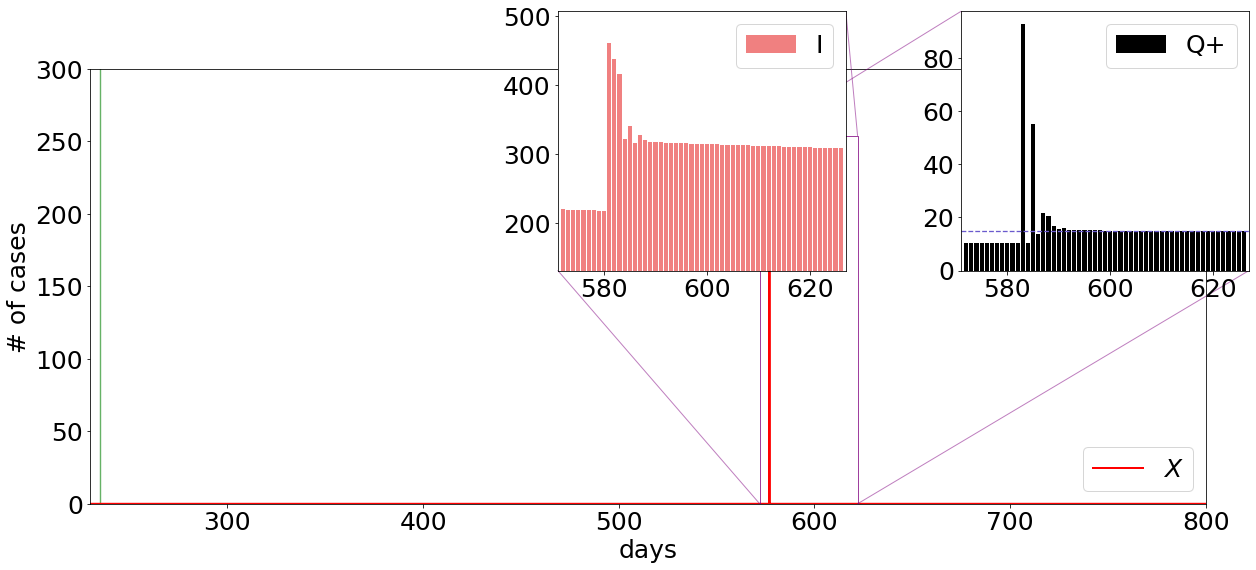

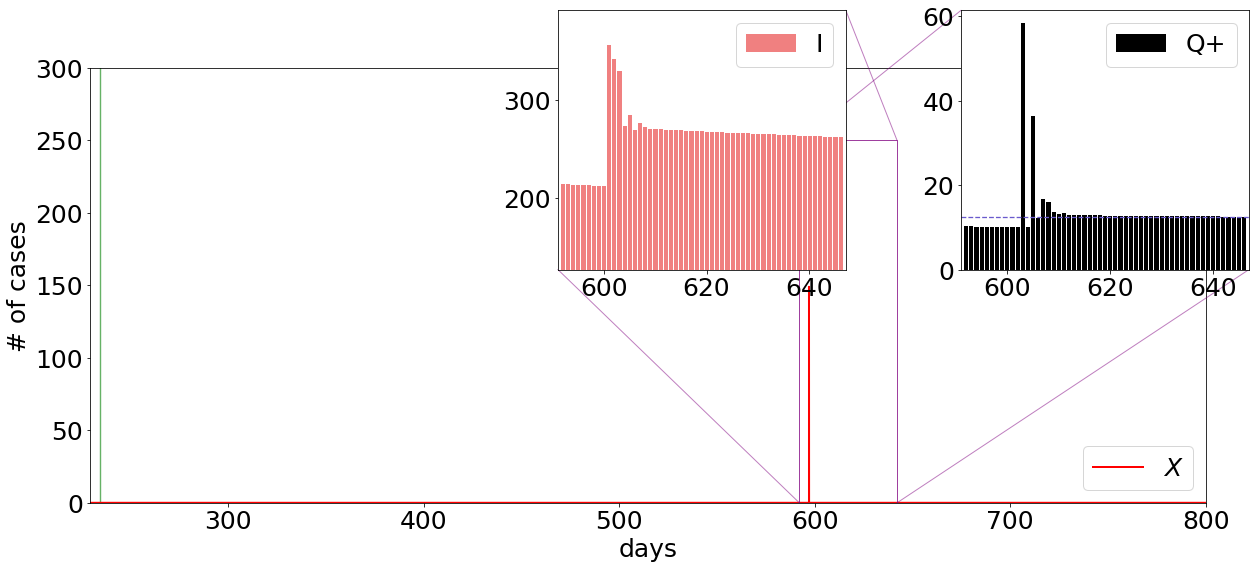

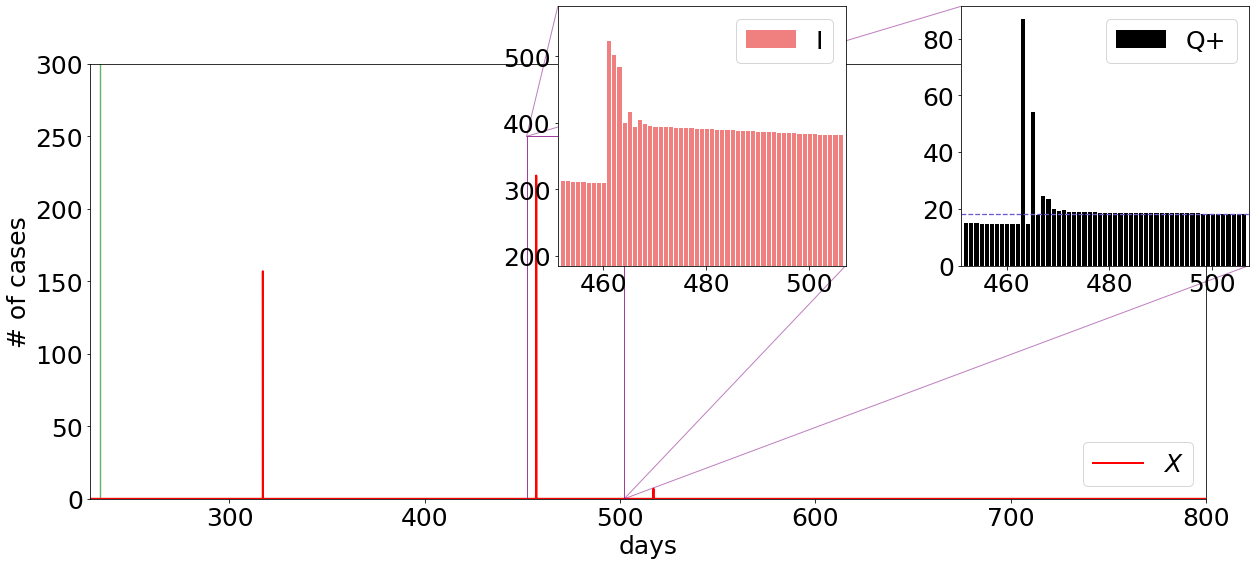

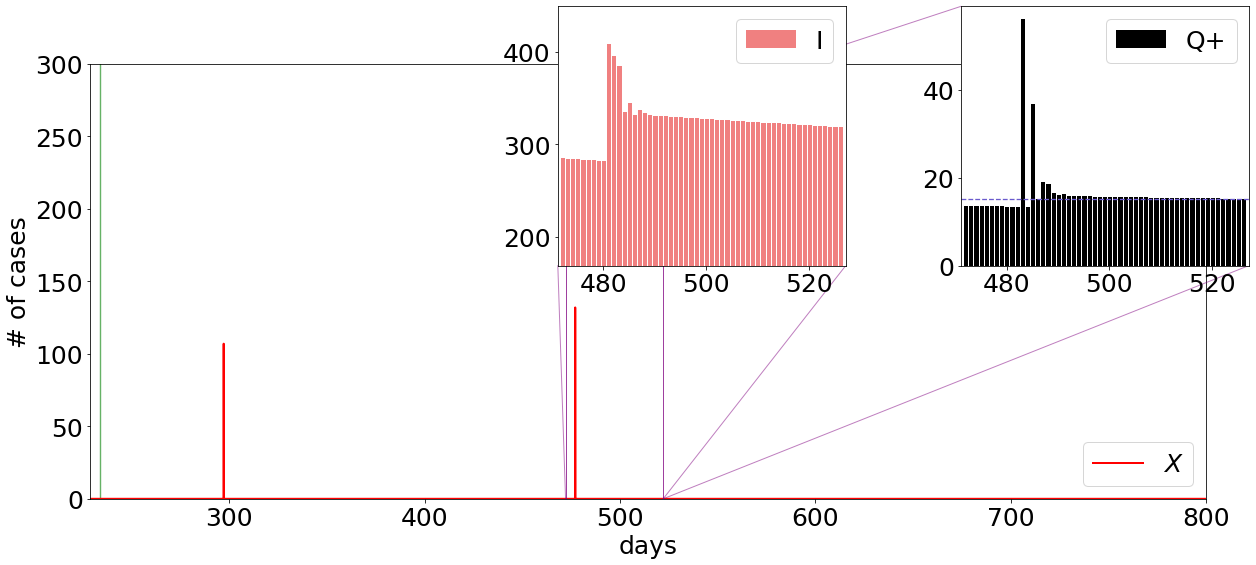

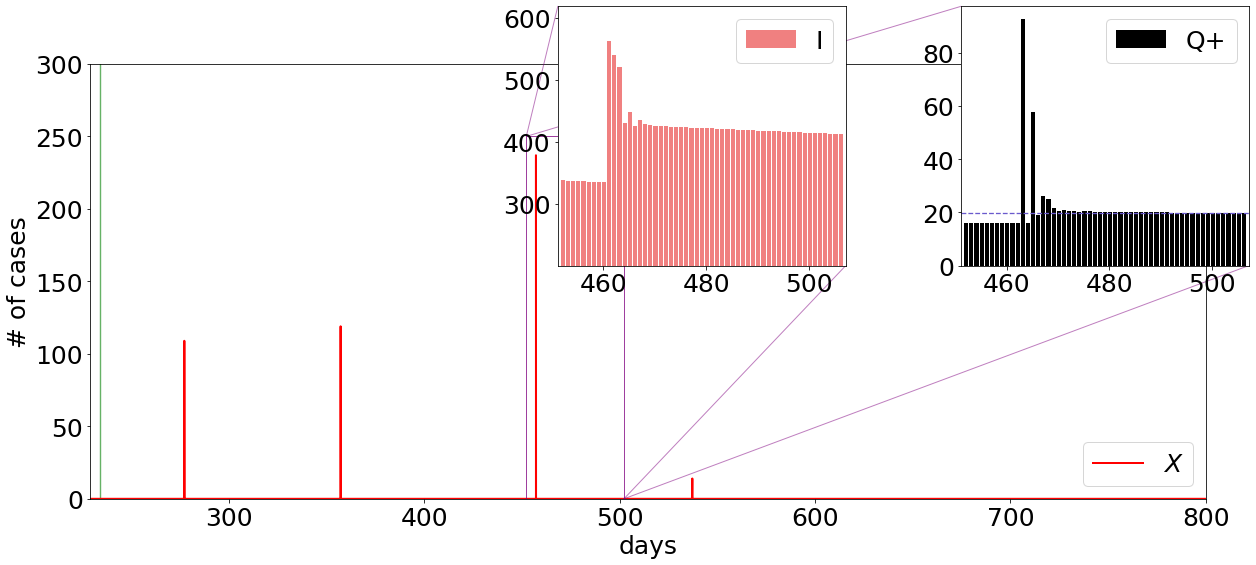

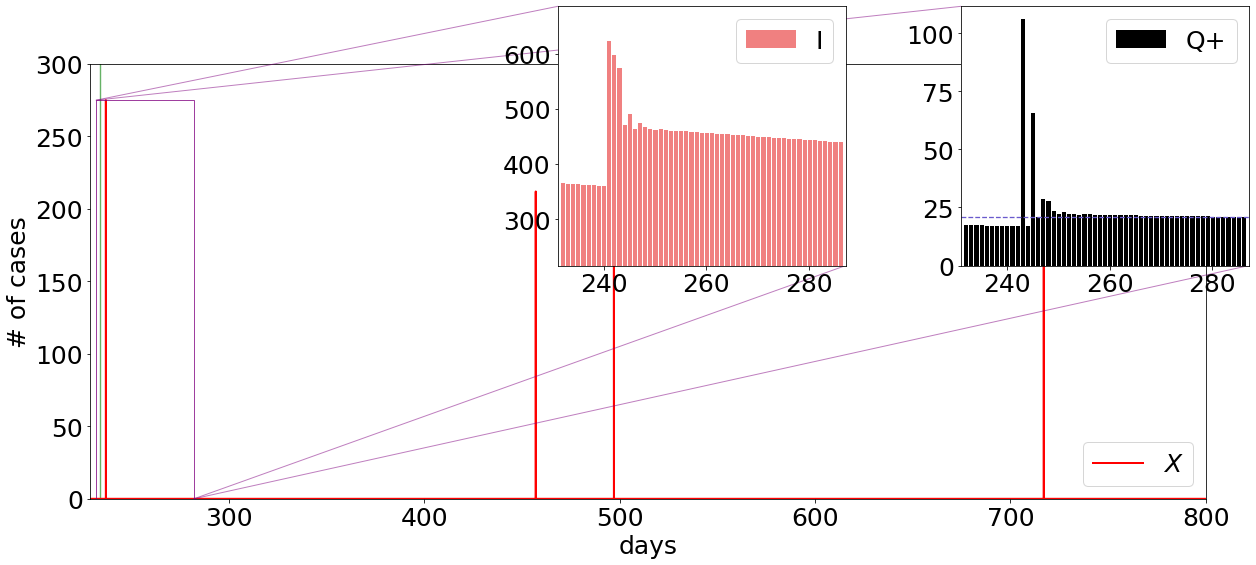

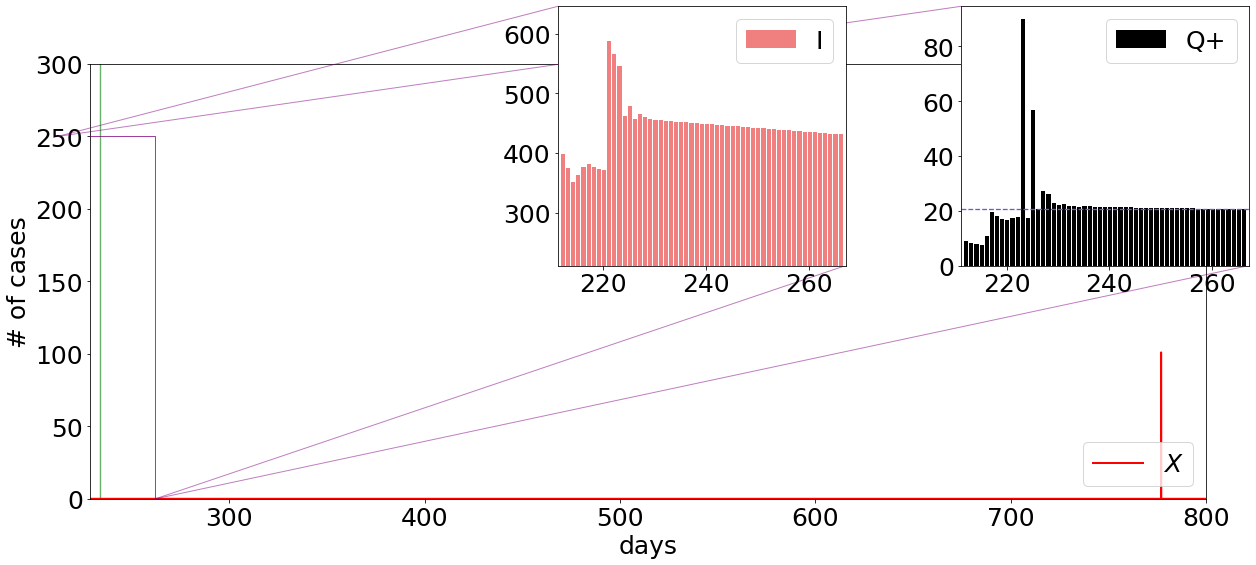

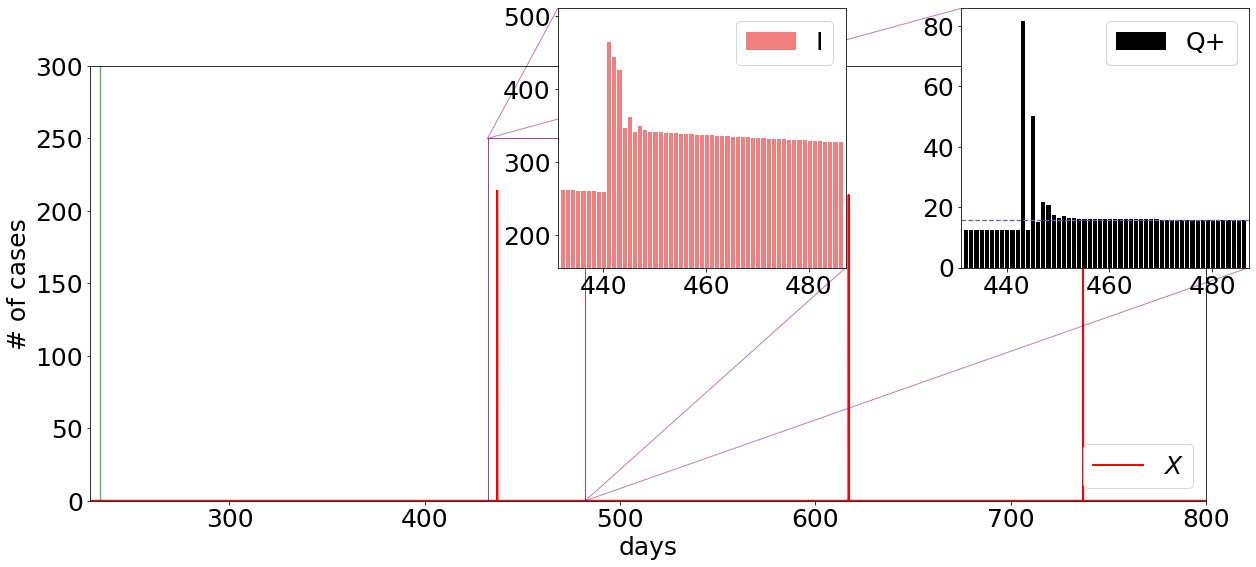

In [49]:
for x in model2s:
  stoch_plot(x)

#### Histograms

In [50]:
test=dict(
  beta= (2/3)*r1/2,
  m= 3*m_0,
  alpha= 0.005,
  gamma= 1,
  sigma= 0.35,#0.3,
  tau= 0.25,#0.2,
  epsilon= lambda t, qp: 1 if t<10 else 1 - 0.5*SEIQR.contact_curve(qp),
  p= p,
  kappa=1.5,
  d_param='delta_open',
  d_func = 1,
  delta_o=0.9,
  dld=0.3,
  qpo=0.00001,

  rand='a',

  t_start=0, 
  dt=0.005,
  t_end=100,

  init=(S0, E0, I0, R0)
)
ct_tracer=SEIQR(**test)
ct_tracer.run()

In [55]:
def ct_plot(x):
  fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(20,8))
  plt.rcParams.update({'font.size': 30})

  fig.suptitle('Zero Tolerance')

  ax1.set_xlabel('x 10 days')
  ax3.set_xlabel('x 10 days')
  ax1.set_ylabel('population')
  ax1.legend(loc='upper right')

  ax1.plot(x.t_vector[x.t0:], x.Qp[x.t0:], label="Q+", c='k', linestyle='dashed', linewidth=2.5)
  ax1.plot(x.t_vector, x.I, label="I", c='r')
  ax1.plot(x.t_vector, x.E, label="E", c='orange')
  ax1.plot(x.t_vector, x.Q, label="Q", c='')
  
  ax1.set_xlim(20, 80)
  ax1.set_ylim(0, 0.00015)


  ax1.legend(loc='upper right')
  r1 = x.m*x.beta
  r2 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
  r3 = np.multiply(r2, (1 - x.R - x.Q))
  r4 = np.multiply(r3, x.epsilon_history)

  ax3.set_xlim(0, 80)
  
  ax3.plot(x.t_vector[:-1], r4[:-1], label="$r_{eff}$", c='slateblue')
  ax3.tick_params(axis='y', labelcolor='slateblue')
  ax5 = ax3.twinx()
  ax5.step(x.t_vector[:-1], x.delta[:-1], label="$\\delta$", c='g')
  ax5.tick_params(axis='y', labelcolor='g')
  ax3.set_ylim(-0.15, 5.15)
  ax5.set_ylim(-0.05, 1.05)
  ax3.legend(loc='lower left')
  ax5.legend(loc='lower right')
  fig.show()

No handles with labels found to put in legend.


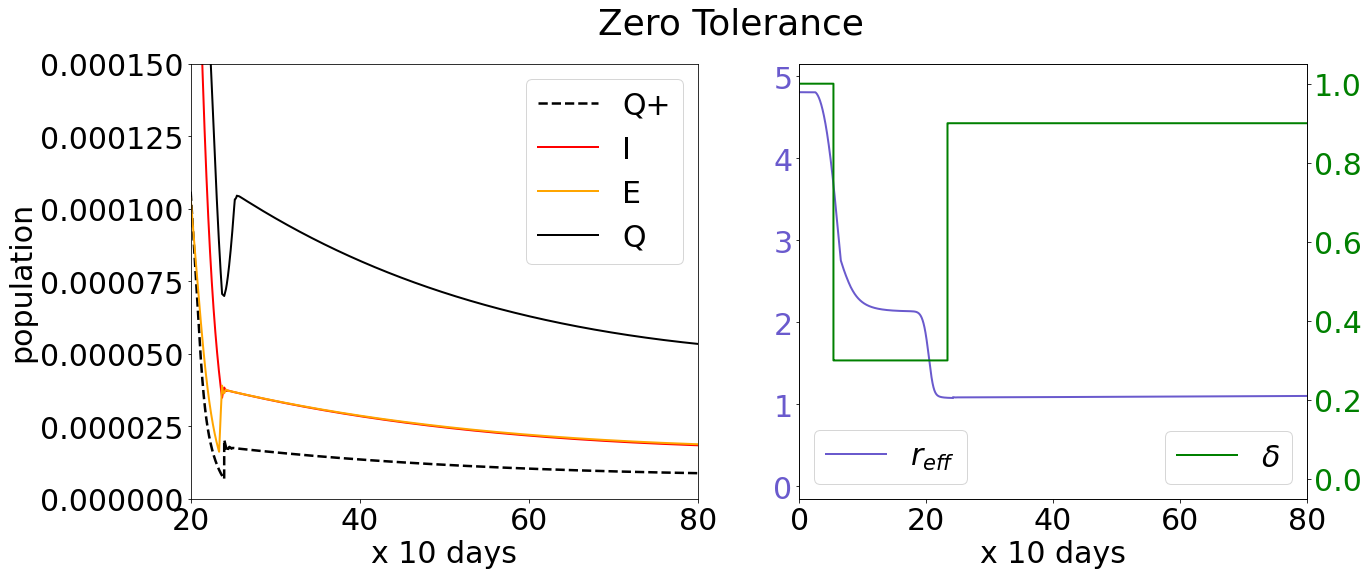

In [56]:
ct_plot(ct_tracer)


#### Plot 2

In [62]:
model2s=[]

test=dict(
  beta= (2/3)*r1/2,
  m= 3*m_0,
  alpha= 0.005,
  gamma= 1,
  sigma= 0.35,#0.3,
  tau= 0.25,#0.2,
  epsilon= lambda t, qp: 1 if t<10 else 1 - 0.5*SEIQR.contact_curve(qp),
  p= p,
  kappa=1.5,
  d_param='new_periodic',
  d_func = 1.2,
  delta_o=0.9,
  dld=0.3,
  qpo=0.001,
  qpld= 0.004,
  r1=r1,
  # rand='manual',
  rand='a',

  t_start=0, 
  dt=0.005,
  t_end=100,

  init=(S0, E0, I0, R0)
)
x=SEIQR(**test)
x.run()
model2s.append(x)

In [66]:
def minint_plot(x, tit=False):
  plt.rcParams.update({'font.size': 34})
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40,12))

  ax1.plot(x.t_vector, x.S, label="S", c='b')
  ax1.plot(x.t_vector, x.E, label="E", c='orange')
  ax1.plot(x.t_vector, x.I, label="I", c='r')
  ax1.plot(x.t_vector, x.R, label="R", c='purple')

  if tit==False:
    title='Living with the Virus'
    fig.suptitle('Model 2')
  else:
    title=tit
  ax2.set_title(title)

  ax1.set_xlabel('x 10 days')
  ax1.set_ylabel('population')
  ax1.legend(loc='upper right')

  ax2.plot(x.t_vector, x.I, label="I", c='r')
  ax2.plot(x.t_vector, x.E, label="E", c='orange')
  ax2.plot(x.t_vector, x.Q, label="Q", c='k')
  ax2.plot(x.t_vector[x.t0:], x.Qp[x.t0:], label="Q+", c='k', linestyle='dashed', linewidth=2.5)
  ax2.axvline(x.t_vector[np.where(x.delta<1)[0][0]],c='g', alpha=0.4)

  r1 = x.m*x.beta
  r2 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
  r3 = np.multiply(r2, (1 - x.R - x.Q))
  r4 = np.multiply(r3, x.epsilon_history)
  
  ax3.plot(x.t_vector[:-1], r4[:-1], label="$r_{eff}$", c='slateblue')
  ax5 = ax3.twinx()
  ax5.step(x.t_vector[:-1], x.delta[:-1], label="$\\delta$", c='g')
  ax5.tick_params(axis='y', labelcolor='g')
  ax3.tick_params(axis='y', labelcolor='slateblue')
  ax3.set_ylim(-0.1, 5.1)
  ax5.set_ylim(-0.05, 1.05)

  ax2.set_xlabel('x 10 days')
  ax3.set_xlabel('x 10 days')
  
  ax1.set_xlim(0, 80)
  ax2.set_xlim(0, 80)
  ax3.set_xlim(0, 80)
  ax1.set_ylim(0)
  ax2.set_ylim(0)
  ax2.legend(loc='upper right')
  ax3.legend(loc='lower left')
  ax5.legend(loc='lower right')
  fig.show()
  # fig1.show()
  # fig2.show()

In [64]:
def model2_plot(x, i):
  # sns.set_color_codes("colorblind")
  plt.style.use('seaborn-pastel')
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

  if i==0:
    title='Zero-Tolerance'
  else:
    title='Zero-Tolerance (failure)'
  fig.suptitle(title)

  ax1.set_xlabel('x 10 days')
  ax1.set_ylabel('population')
  ax1.legend(loc='upper right')

  ax1.plot(x.t_vector, x.I, label="I", c='r')
  ax1.plot(x.t_vector, x.E, label="E", c='orange')
  ax1.plot(x.t_vector, x.Q, label="Q", c='k')
  ax1.plot(x.t_vector[x.t0:], x.Qp[x.t0:], label="Q+", c='k', linestyle='dashed', linewidth=2.5)

  ax1.axvline(x.t_vector[np.where(x.delta<1)[0][0]],c='g', alpha=0.4)

  r1 = x.m*x.beta
  r2 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
  r3 = np.multiply(r2, (1 - x.R - x.Q))
  r4 = np.multiply(r3, x.epsilon_history)
  ax2.plot(x.t_vector[:-1], r4[:-1], label="$r_{eff}$", c='slateblue')

  ax5 = ax2.twinx()
  ax5.step(x.t_vector[:-1], x.delta[:-1], label="$\\delta$", c='g')

  ax2.tick_params(axis='y', labelcolor='slateblue')
  ax5.tick_params(axis='y', labelcolor='g')
  ax2.set_ylim(-0.1, 5.1)

  ax5.set_ylim(-0.05, 1.05)


  ax2.set_xlabel('x 10 days')
  
  ax1.set_xlim(0, 80)
  ax2.set_xlim(0, 80)
  ax1.set_ylim(0, 0.01)


  ax2.legend(loc='lower left')
  ax5.legend(loc='lower right')
  ax1.legend(loc='upper right')
  fig.show()

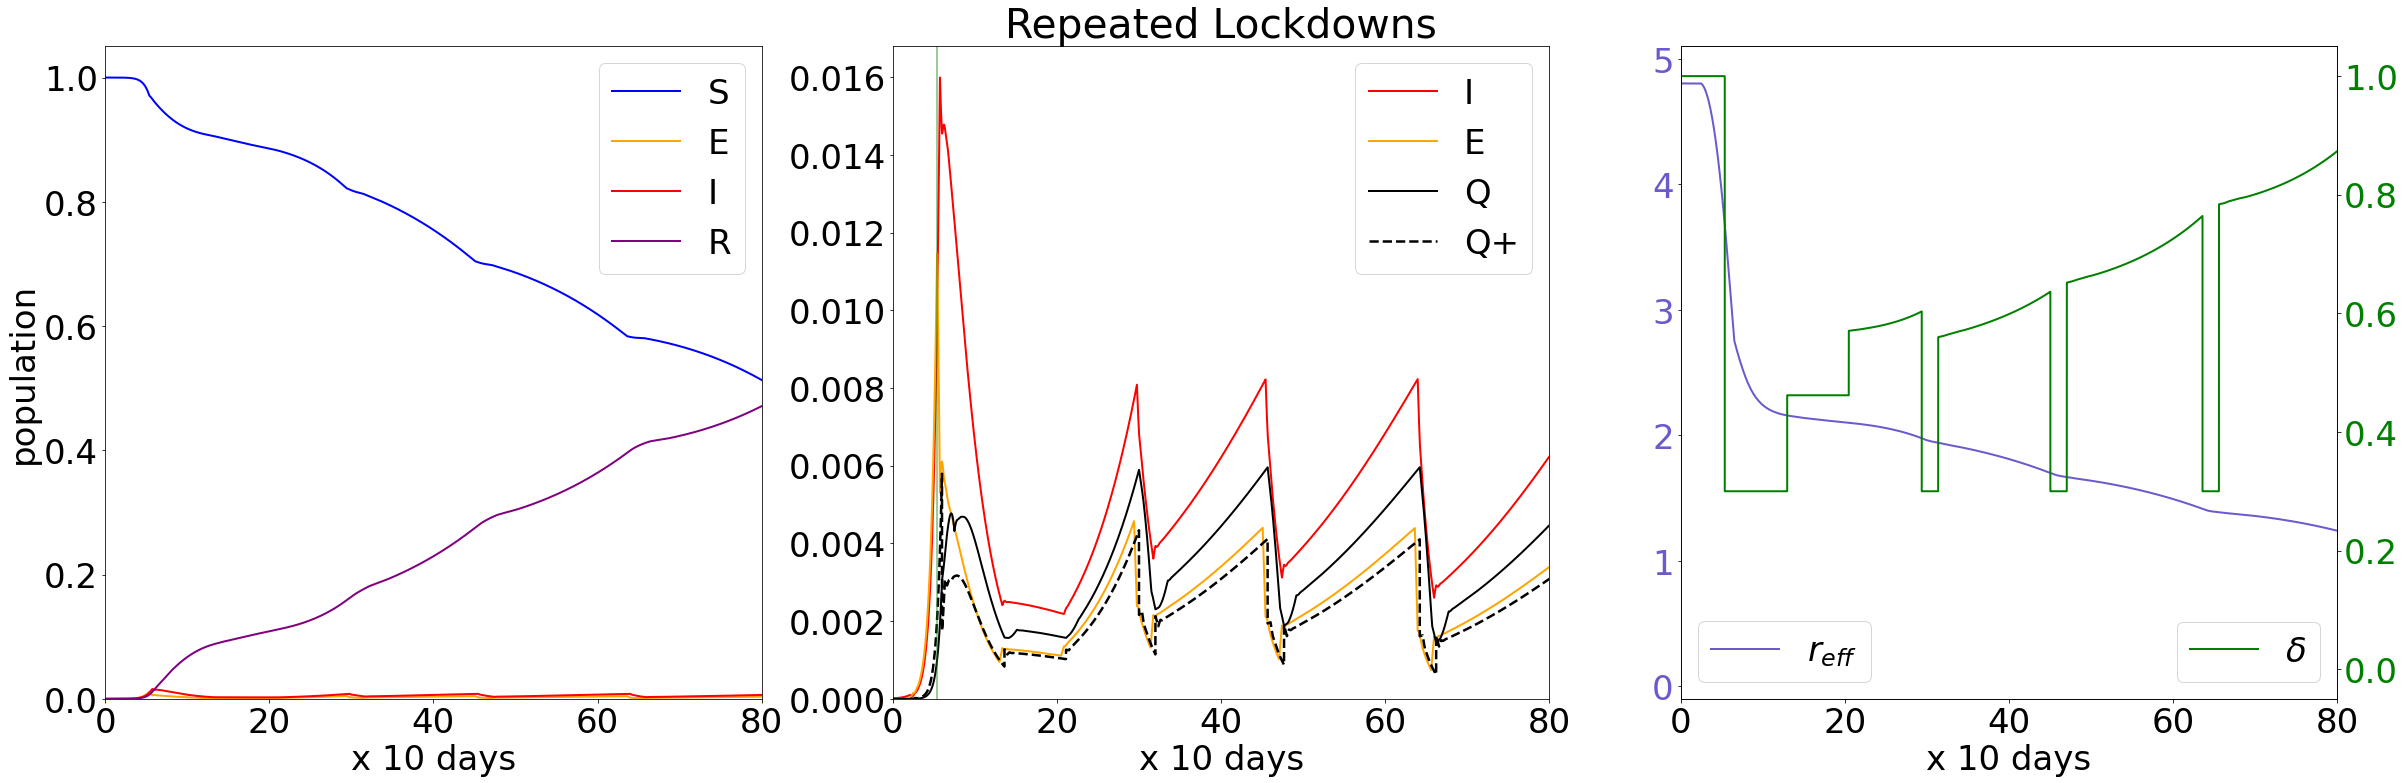

In [67]:
rpt_lock = model2s[0]
minint_plot(rpt_lock, 'Repeated Lockdowns')

## Min Intervention

In [73]:
min_int_prams=dict(
  beta= (2/3)*r1/2,
  m= 3*m_0,
  alpha= 0.005,
  gamma= 1,
  sigma= 0.35,#0.3,
  tau= 0.25,#0.2,
  epsilon= lambda t, qp: 1 if t<10 else 1 - 0.5*SEIQR.contact_curve(qp),
  p= p,
  kappa=1.5,
  d_param='new_model3BIG',
  steer_value= 0.001,
  d_func = 1.025,
  delta_o=1,
  qpo=0.0015,
  r1=r1,
  dld=0.3,
  rand='a',


  t_start=0, 
  dt=0.005,
  t_end=100,

  init=(S0, E0, I0, R0)
)
min_int=SEIQR(**min_int_prams)
min_int.run()

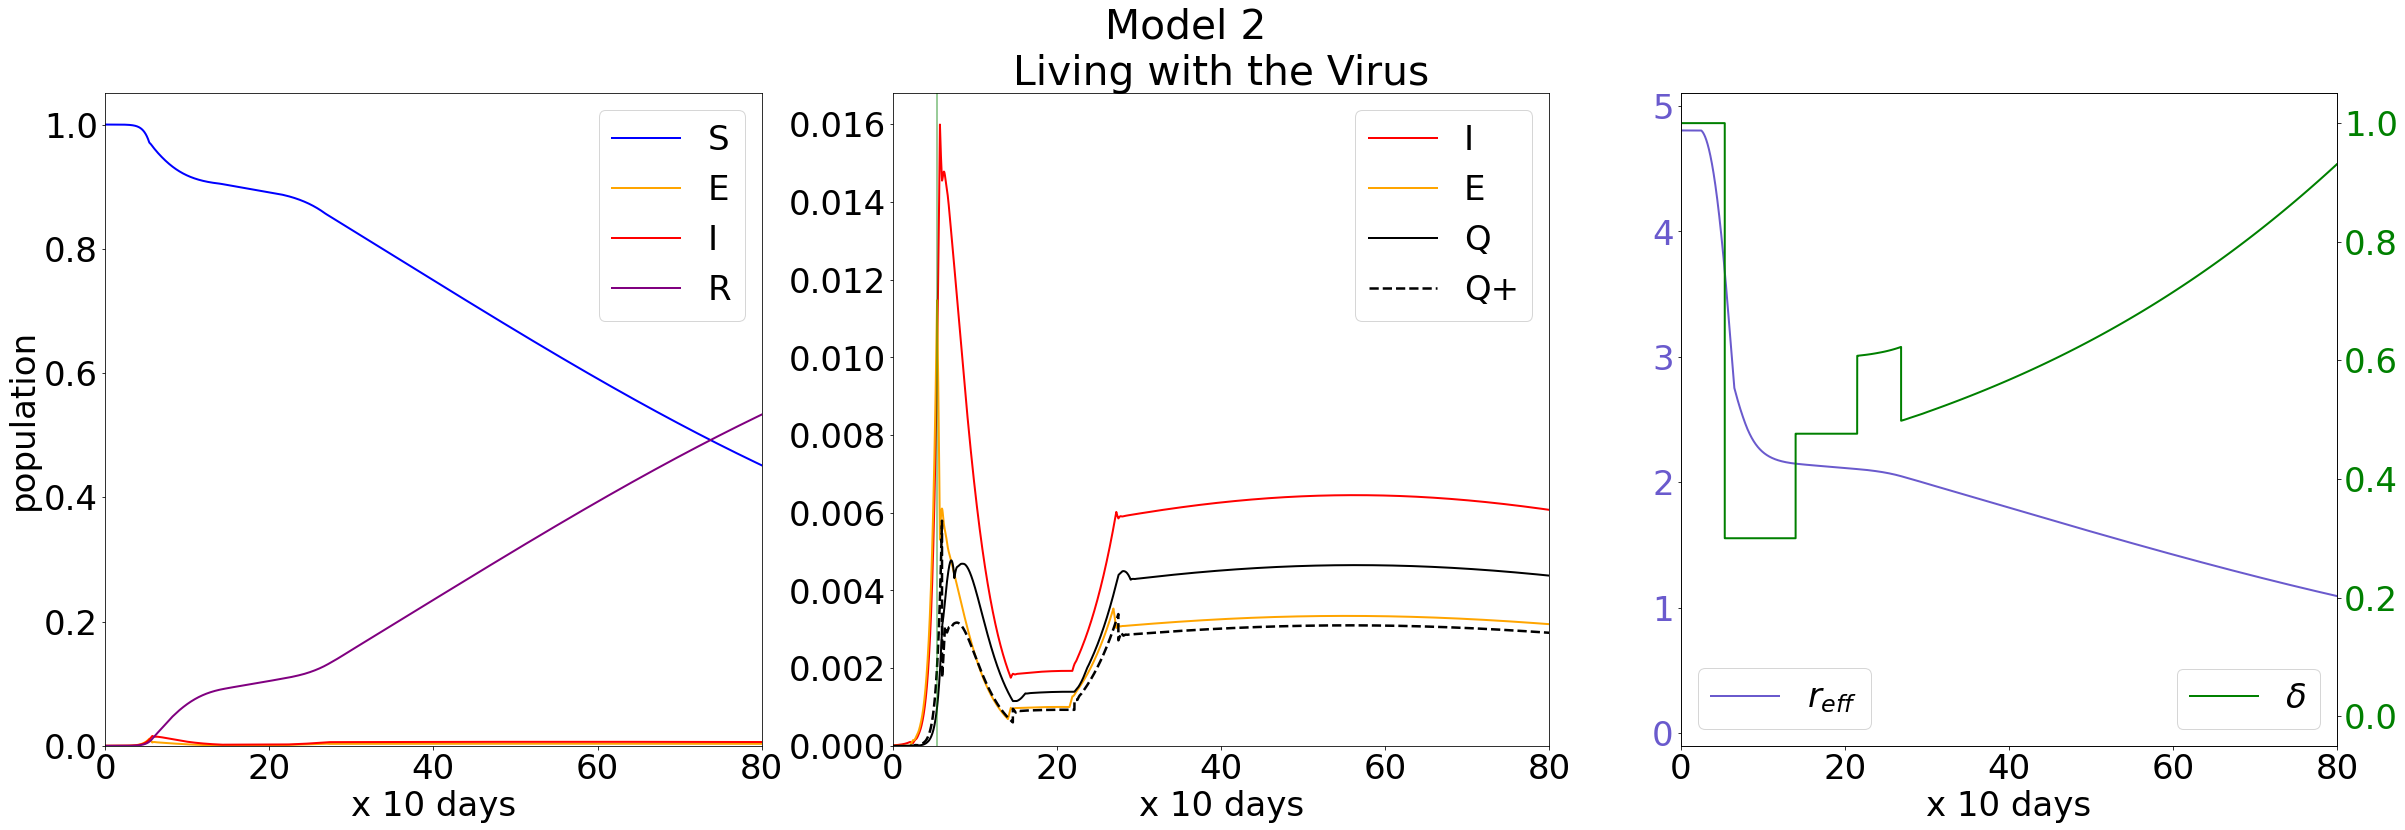

In [74]:
minint_plot(min_int)

## Comparison

Text(0, 0.5, '$\\delta$')

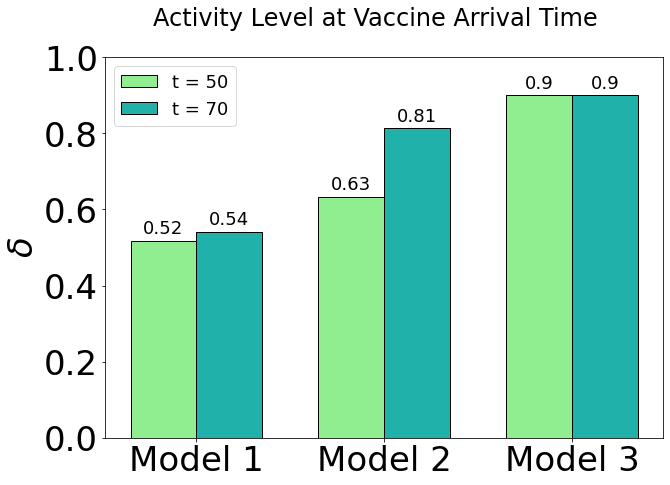

In [75]:
models=[steer_smol, min_int, ct_tracer]
fig, (ax2) = plt.subplots(1, 1, figsize=(10, 7))
plt.rcParams.update({'font.size': 20})
fig.suptitle('Activity Level at Vaccine Arrival Time')


denom50 =(np.cumsum(baseline.dt*baseline.delta)/(baseline.dt*baseline.size))[int(50/baseline.dt)]
denom70 =(np.cumsum(baseline.dt*baseline.delta)/(baseline.dt*baseline.size))[int(70/baseline.dt)]

labels = ['Model 1', 'Model 2', 'Model 3']
x = np.arange(len(labels))


y70=[i.delta[int(70/baseline.dt)] for i in models]
y50=[i.delta[int(50/baseline.dt)] for i in models]

width = 0.35
rects1 = ax2.bar(x - width/2, y50, width, label='t = 50', color='lightgreen', edgecolor='k')
rects2 = ax2.bar(x + width/2, y70, width, label='t = 70', color='lightseagreen', edgecolor='k')

ax2.set_xticks(x)
ax2.set_xticklabels(labels)

def autolabel(rects):
    plt.rcParams.update({'font.size': 18})
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
ax2.legend(loc='upper left')

plt.rcParams.update({'font.size': 20})
ax2.set_ylim(0, 1)
ax2.set_ylabel('$\\delta$')

(-0.5, 4.5)

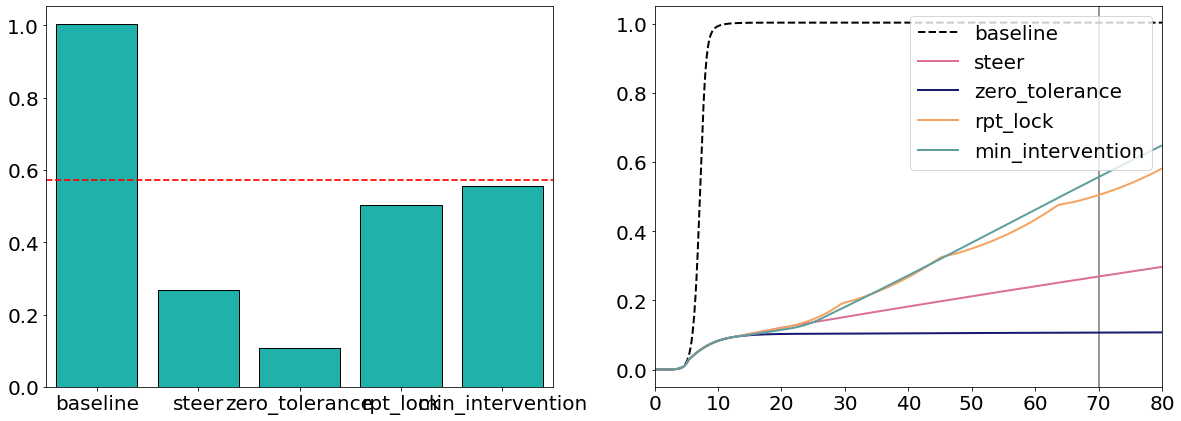

In [76]:
rptl=np.cumsum(rpt_lock.dt*rpt_lock.Ep)
x=rpt_lock
r1 = x.m*x.beta
r2 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
# r3 = np.multiply(r2, (1 - x.R - x.Q))
r4 = np.multiply(r2, x.epsilon_history)
rptR=1-x.Q[int(80/x.dt)]-(1/r4)[int(80/x.dt)]



bsl=np.cumsum(baseline.dt*baseline.Ep)
x=baseline
r1 = x.m*x.beta
r2 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
# r3 = np.multiply(r2, (1 - x.R - x.Q))
r4 = np.multiply(r2, x.epsilon_history)
bsR=1-x.Q[int(80/x.dt)]-(1/r4)[int(80/x.dt)]


stl=np.cumsum(steer_smol.dt*steer_smol.Ep)
x=steer_smol
r1 = x.m*x.beta
r2 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
# r3 = np.multiply(r2, (1 - x.R - x.Q))
r4 = np.multiply(r2, x.epsilon_history)
stlR=1-x.Q[int(80/x.dt)]-(1/r4)[int(80/x.dt)]





ztl=np.cumsum(ct_tracer.dt*ct_tracer.Ep)
x=ct_tracer
r1 = x.m*x.beta
r2 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
# r3 = np.multiply(r2, (1 - x.R - x.Q))
r4 = np.multiply(r2, x.epsilon_history)
ztlR=1-x.Q[int(80/x.dt)]-(1/r4)[int(80/x.dt)]




mnl=np.cumsum(min_int.dt*min_int.Ep)
x=min_int
r1 = x.m*x.beta
r2 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
# r3 = np.multiply(r2, (1 - x.R - x.Q))
r4 = np.multiply(r2, x.epsilon_history)
mnltR=1-x.Q[int(80/x.dt)]-(1/r4)[int(80/x.dt)]



fig, (ax3, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax2.plot(baseline.t_vector, bsl, 'k--', label='baseline')
ax2.plot(steer_smol.t_vector, stl, label='steer', color='palevioletred')
# ax2.plot(steer_med.t_vector, stl2, label='steer_05')
ax2.plot(ct_tracer.t_vector, ztl, label='zero_tolerance', color='midnightblue')
ax2.plot(rpt_lock.t_vector, rptl, 'b', label='rpt_lock', color='sandybrown')
ax2.plot(min_int.t_vector, mnl, label='min_intervention', color='cadetblue')
ax2.legend(loc='upper right')
ax2.set_xlim(0, 80)
ax2.set_ylim(-0.05, 1.05)
ax2.vlines(70, -0.05, 1.05, 'k', alpha=0.4)

ax3.bar(['baseline', 'steer', 'zero_tolerance', 'rpt_lock', 'min_intervention'],
        [bsl[int(70/x.dt)], stl[int(70/x.dt)],  ztl[int(70/x.dt)], rptl[int(70/x.dt)], mnl[int(70/x.dt)]], color='lightseagreen', edgecolor='k')
        # [bsR, stlR, stl2R, ztlR, rptR, mnltR])
ax3.hlines(rptR, -0.5, 6, color='r', linestyles='dashed', linewidth=1.7)
ax3.set_xlim(-0.5, 4.5)

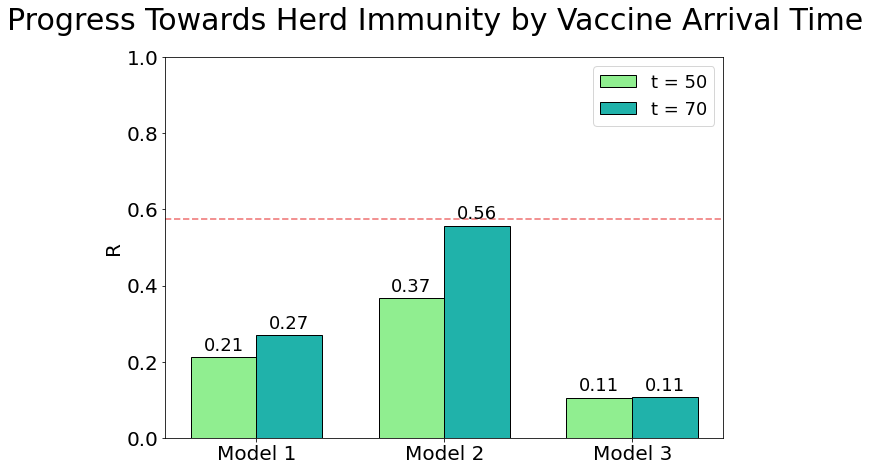

In [77]:
stl=np.cumsum(steer_smol.dt*steer_smol.Ep)
x=steer_smol
r1 = x.m*x.beta
r4 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
# r3 = np.multiply(r2, (1 - x.R - x.Q))
stlR=1-x.Q[int(80/x.dt)]-(1/r4)[int(80/x.dt)]

mnl=np.cumsum(min_int.dt*min_int.Ep)
x=min_int
r1 = x.m*x.beta
r2 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
# r3 = np.multiply(r2, (1 - x.R - x.Q))
r4 = np.multiply(r2, x.epsilon_history)
mnltR=1-x.Q[int(80/x.dt)]-(1/r4)[int(80/x.dt)]


ztl=np.cumsum(ct_tracer.dt*ct_tracer.Ep)
x=ct_tracer
r1 = x.m*x.beta
r2 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
# r3 = np.multiply(r2, (1 - x.R - x.Q))
r4 = np.multiply(r2, x.epsilon_history)
ztlR=1-x.Q[int(80/x.dt)]-(1/r4)[int(80/x.dt)]



fig, (ax2) = plt.subplots(1, 1, figsize=(10, 7))
plt.rcParams.update({'font.size': 25})
fig.suptitle('Progress Towards Herd Immunity by Vaccine Arrival Time')



labels = ['Model 1', 'Model 2', 'Model 3']

y70 = [stl[int(70/x.dt)],
       mnl[int(70/x.dt)],
       ztl[int(70/x.dt)],
       ]
y50 = [stl[int(50/x.dt)],
       mnl[int(50/x.dt)],
       ztl[int(50/x.dt)],
       ]

x = np.arange(len(labels))

width = 0.35
rects1 = ax2.bar(x - width/2, y50, width, label='t = 50', color='lightgreen', edgecolor='k')
rects2 = ax2.bar(x + width/2, y70, width, label='t = 70', color='lightseagreen', edgecolor='k')

ax2.set_xticks(x)
ax2.set_xticklabels(labels)

autolabel(rects1)
autolabel(rects2)
ax2.legend()

plt.rcParams.update({'font.size': 25})
ax2.set_ylim(0, 1)
ax2.set_ylabel('R')
ax2.axhline(stlR, color='lightcoral', linestyle='dashed', linewidth=1.7)

Text(0, 0.5, 'R')

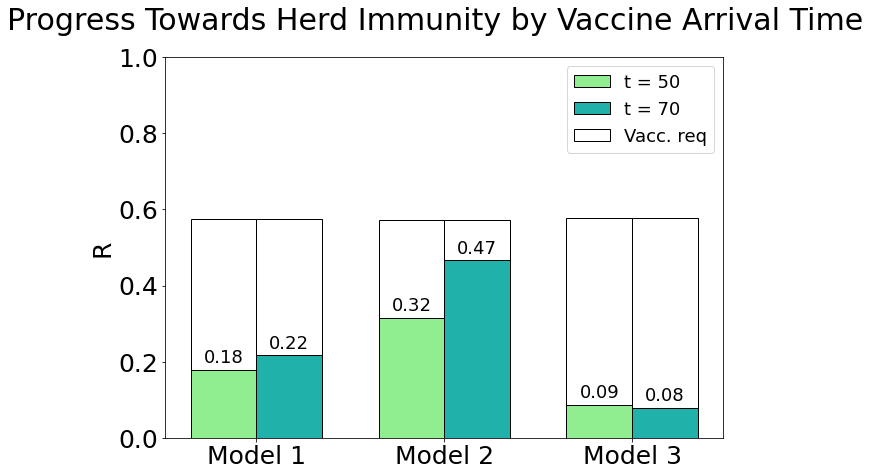

In [ ]:
fig, (ax2) = plt.subplots(1, 1, figsize=(10, 7))
plt.rcParams.update({'font.size': 25})
fig.suptitle('Progress Towards Herd Immunity by Vaccine Arrival Time')

x=steer_smol
r1 = x.m*x.beta
r4 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
stlR50=1-x.Q[int(50/x.dt)]-(1/r4)[int(50/x.dt)]-x.R[int(50/x.dt)]
stlR70=1-x.Q[int(70/x.dt)]-(1/r4)[int(70/x.dt)]-x.R[int(70/x.dt)]

x=min_int
r1 = x.m*x.beta
r4 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
mnlR50=1-x.Q[int(50/x.dt)]-(1/r4)[int(50/x.dt)]-x.R[int(50/x.dt)]
mnlR70=1-x.Q[int(70/x.dt)]-(1/r4)[int(70/x.dt)]-x.R[int(70/x.dt)]

x=ct_tracer
r1 = x.m*x.beta
r4 = np.multiply(r1, (1 - x.p*np.exp(-x.tau)))
ztlR50=1-x.Q[int(50/x.dt)]-(1/r4)[int(50/x.dt)]-x.R[int(50/x.dt)]
ztlR70=1-x.Q[int(70/x.dt)]-(1/r4)[int(70/x.dt)]-x.R[int(70/x.dt)]

# denom =(np.cumsum(baseline.dt*baseline.delta)/(baseline.dt*baseline.size))[int(60/baseline.dt)]

labels = ['Model 1', 'Model 2', 'Model 3']

y70 = [steer_smol.R[int(70/baseline.dt)],
       min_int.R[int(70/baseline.dt)],
       ct_tracer.R[int(70/baseline.dt)],
       ]
y50 = [steer_smol.R[int(50/baseline.dt)],
       min_int.R[int(50/baseline.dt)],
       ct_tracer.R[int(50/baseline.dt)],
       ]

x = np.arange(len(labels))

vreq50 = [stlR50, mnlR50, ztlR50]
vreq70 = [stlR70, mnlR70, ztlR70]

width = 0.35
rects1 = ax2.bar(x - width/2, y50, width, label='t = 50', color='lightgreen', edgecolor='k')
rects2 = ax2.bar(x + width/2, y70, width, label='t = 70', color='lightseagreen', edgecolor='k')

ax2.bar(x - width/2, vreq50, width, bottom=y50, color='white', edgecolor='k')
ax2.bar(x + width/2, vreq70, width, label='Vacc. req', bottom=y70, color='white', edgecolor='k')

ax2.set_xticks(x)
ax2.set_xticklabels(labels)

autolabel(rects1)
autolabel(rects2)
# ax2.axhline(stlR50 + steer_smol.R[int(50/steer_smol.dt)], label='Herd imm.', color='lightcoral', linestyle='dashed', linewidth=1.7)
ax2.legend()

plt.rcParams.update({'font.size': 25})
ax2.set_ylim(0, 1)
ax2.set_ylabel('R')



## test

In [78]:
testis=[]
x5= [0.0000025*i for i in range(1, 120)]
# x6= [0.000045, 0.000052]
# x5.extend(x6)
for qpo in x5:#, 0.000017, 0.00002, 0.00003, 0.00005]: #np.arange(0.00001, 0.00005, 0.00001): 
  test=dict(
    beta= (2/3)*r1/2,
    m= 3*m_0,
    alpha= 0.005,
    gamma= 1,
    sigma= 0.3,
    epsilon= lambda t, qp: 1 if t<10 else 1 - 0.5*SEIQR.contact_curve(qp),
    p= p,#SEIQR.transition(0.05, 0.35, 3.5, 6.25, x.t_vector),
    tau= 0.2,
    kappa=1.5,
    d_param='delta_open',
    d_func = 1,
    delta_o=0.9,
    dld=0.3,
    qpo=qpo,
    r1=r1,
    rand='a',
    
    t_start=0, 
    dt=0.005,
    t_end=100,

    init=(S0, E0, I0, R0)
  )
  x=SEIQR(**test)
  x.run()
  testis.append(x)
  

In [79]:
x1, y1 =[], []

for j in range(len(testis)):
  test = testis[j]
  t3 = np.where(test.delta[1:]>test.delta[:-1])[0][0]
  x1.append(test.Qp[t3])
  y1.append(1 - SEIQR.test(test, t3))
    
x1=np.asarray(x1)[::-1]
y1=np.asarray(y1)[::-1]

y5 = [0.5*SEIQR.contact_curve(i) for i in x5]
x = [i/100000 for i in range(0, 26)]
# ax.plot(x, [0.5*SEIQR.contact_curve(i) for i in x], 'k')
intersection_idx = np.where(y1<y5)[0][-1]
intersection_idx2 = np.where(y1>y5)[0][0]


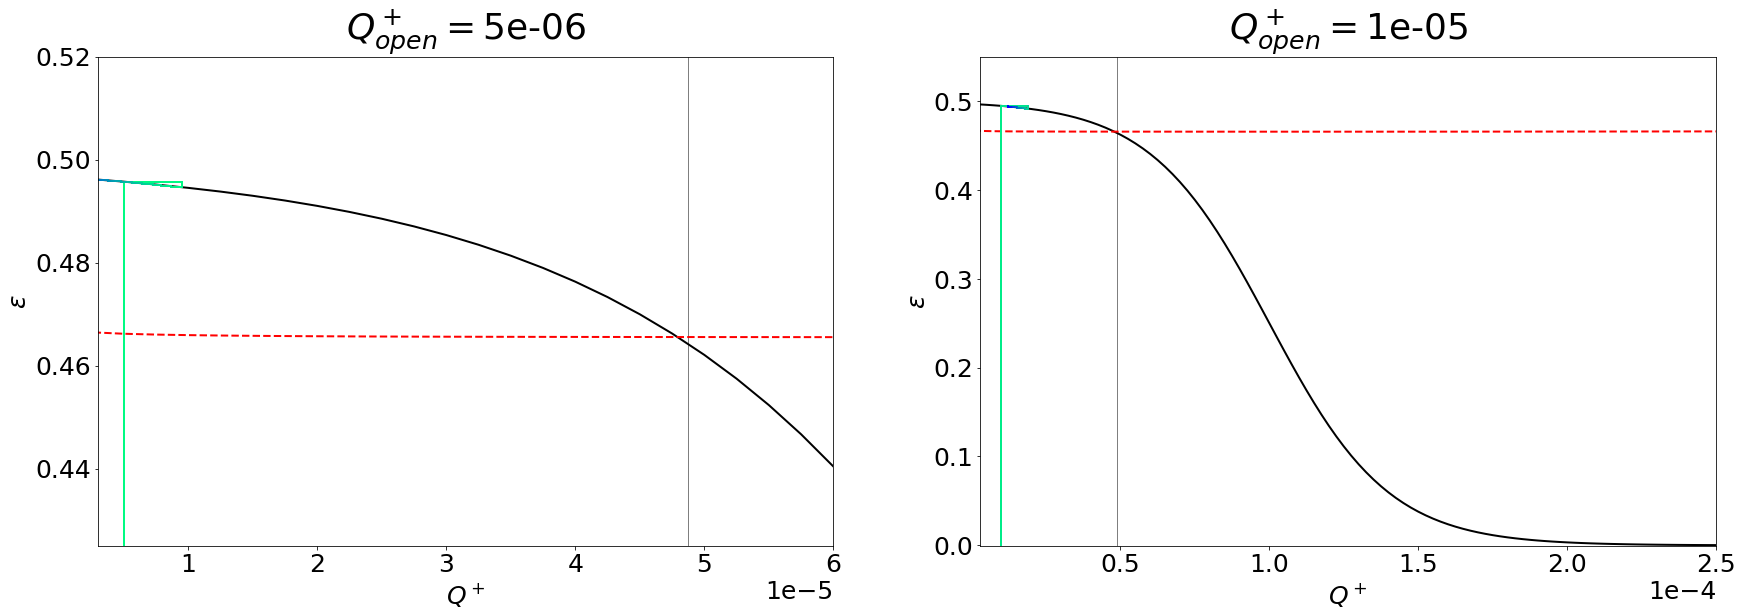

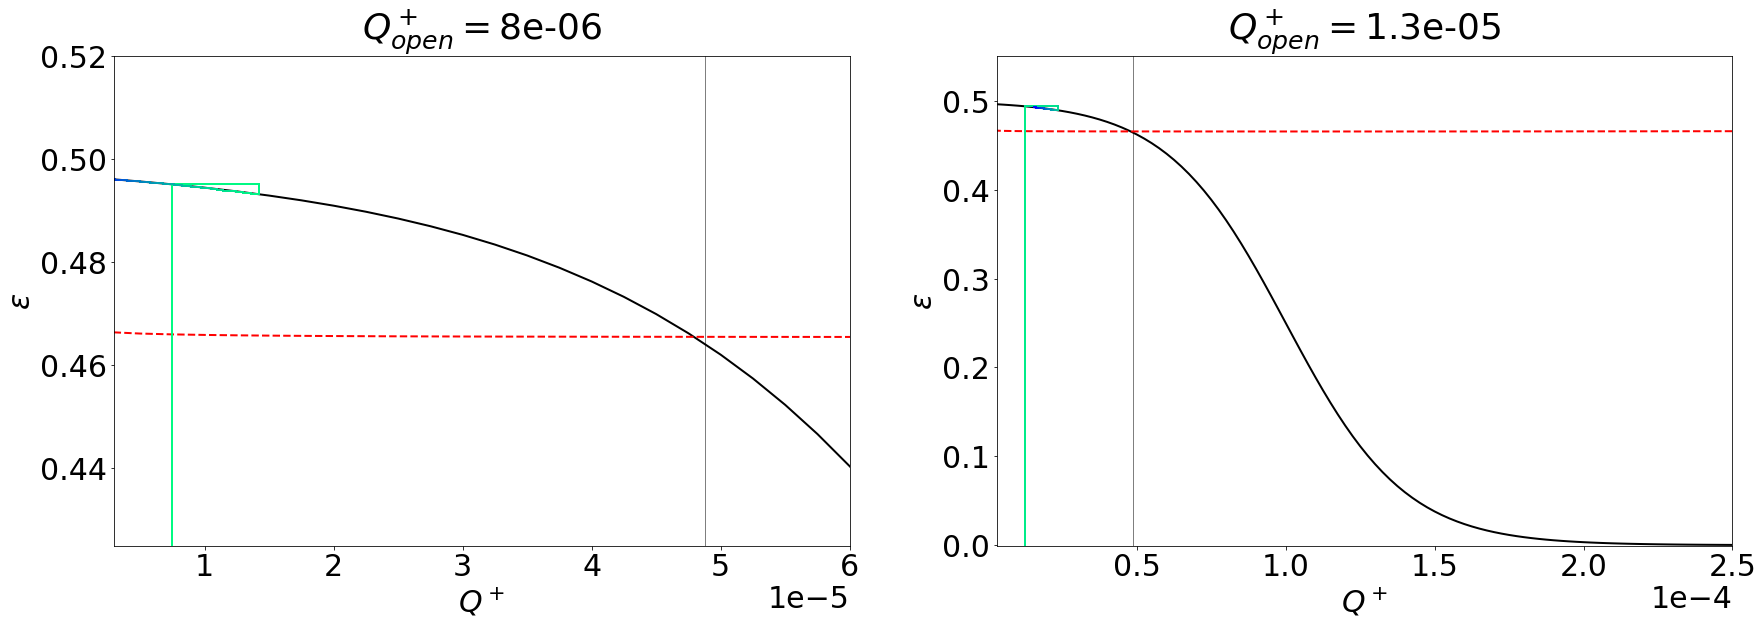

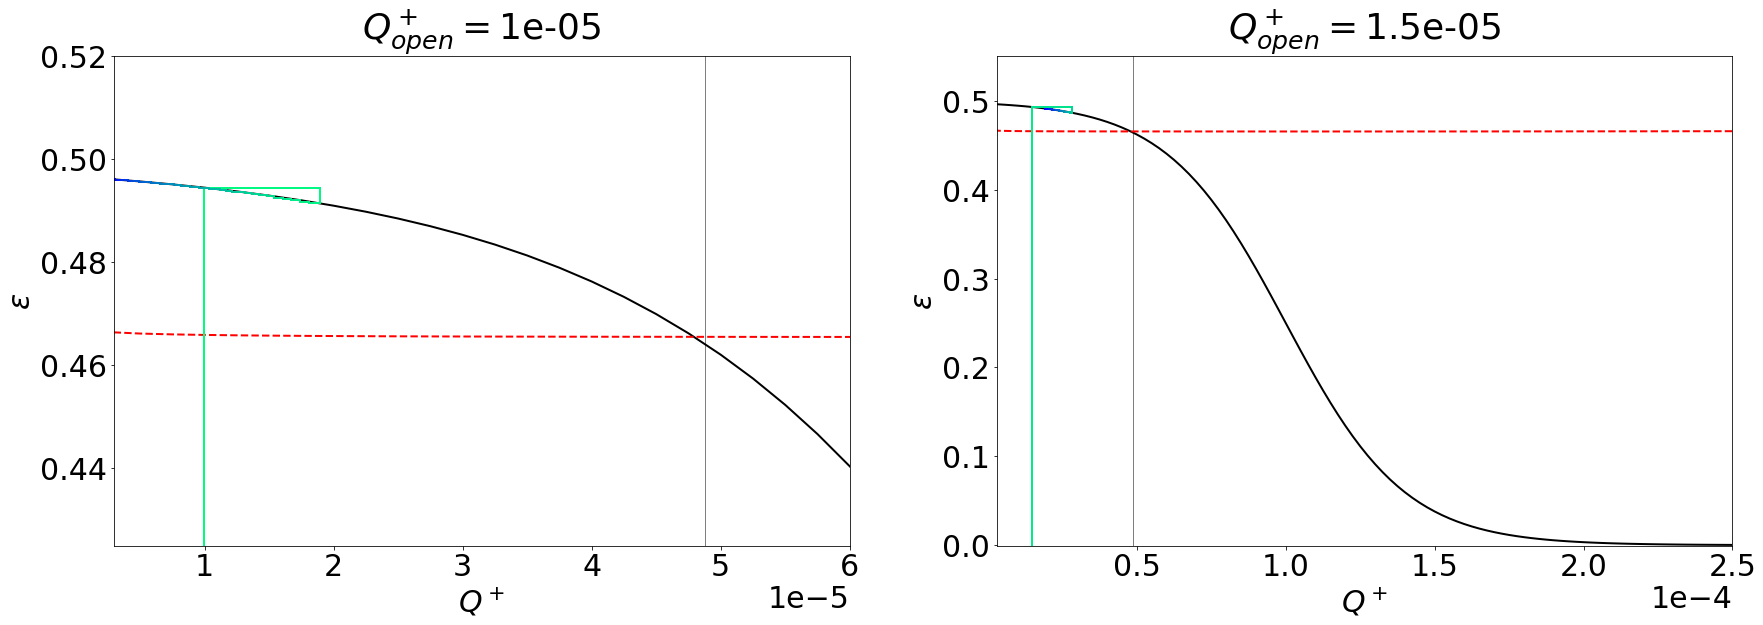

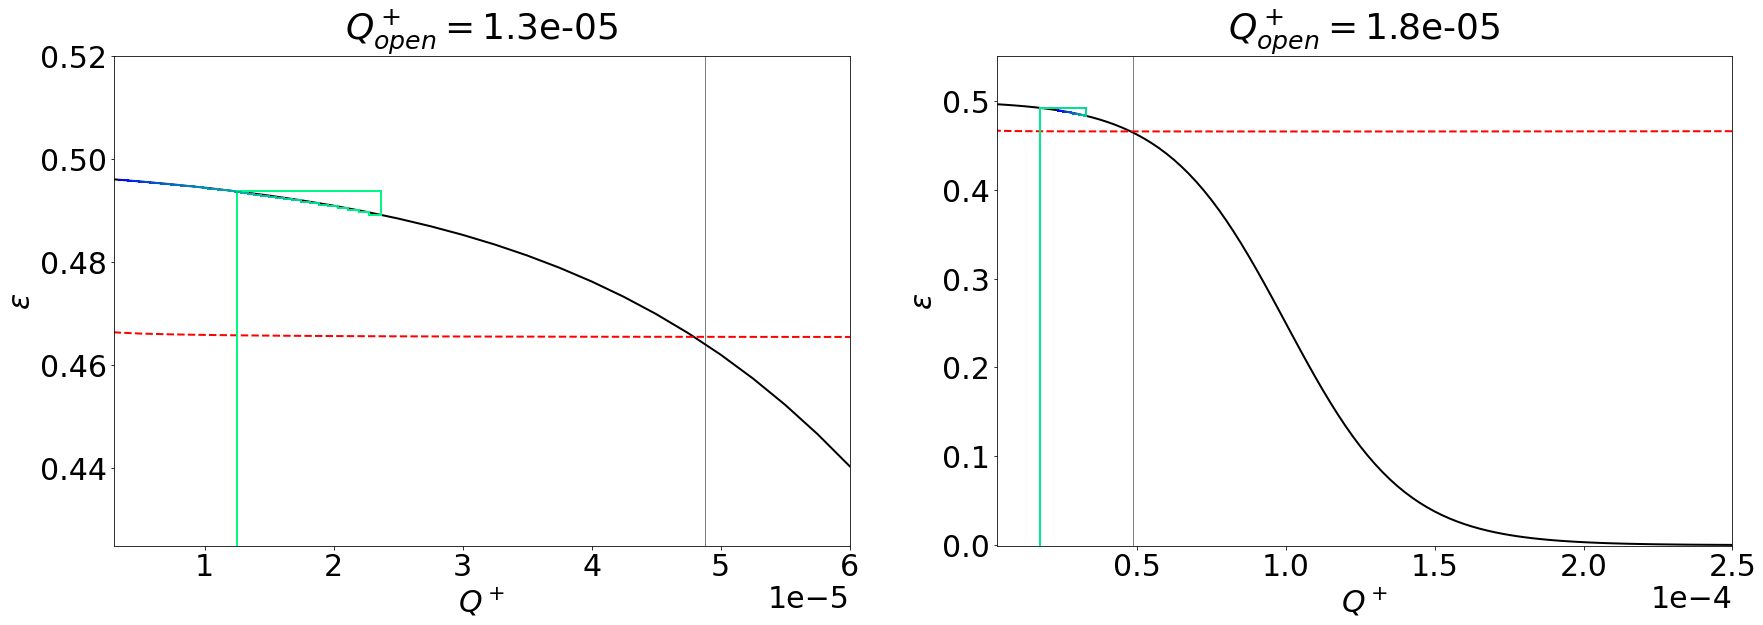

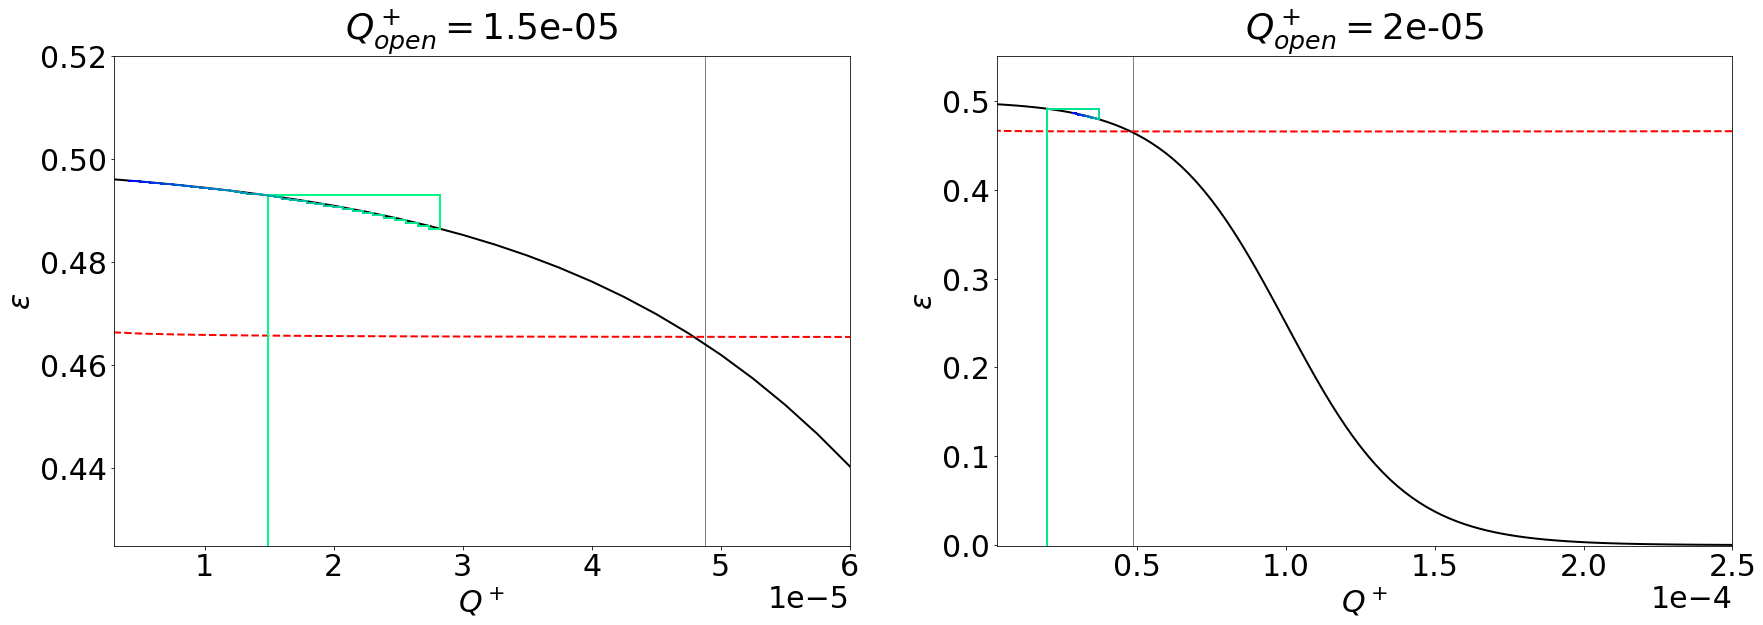

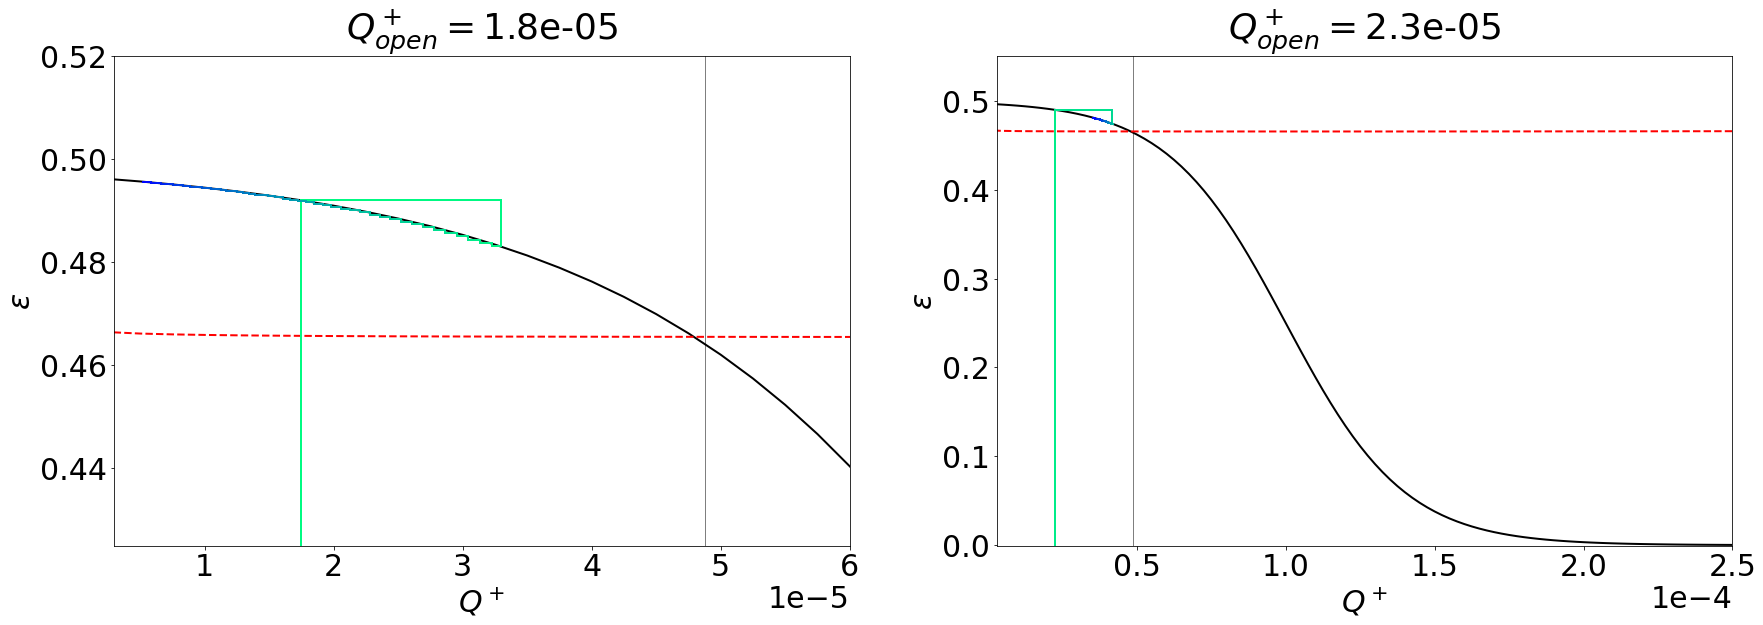

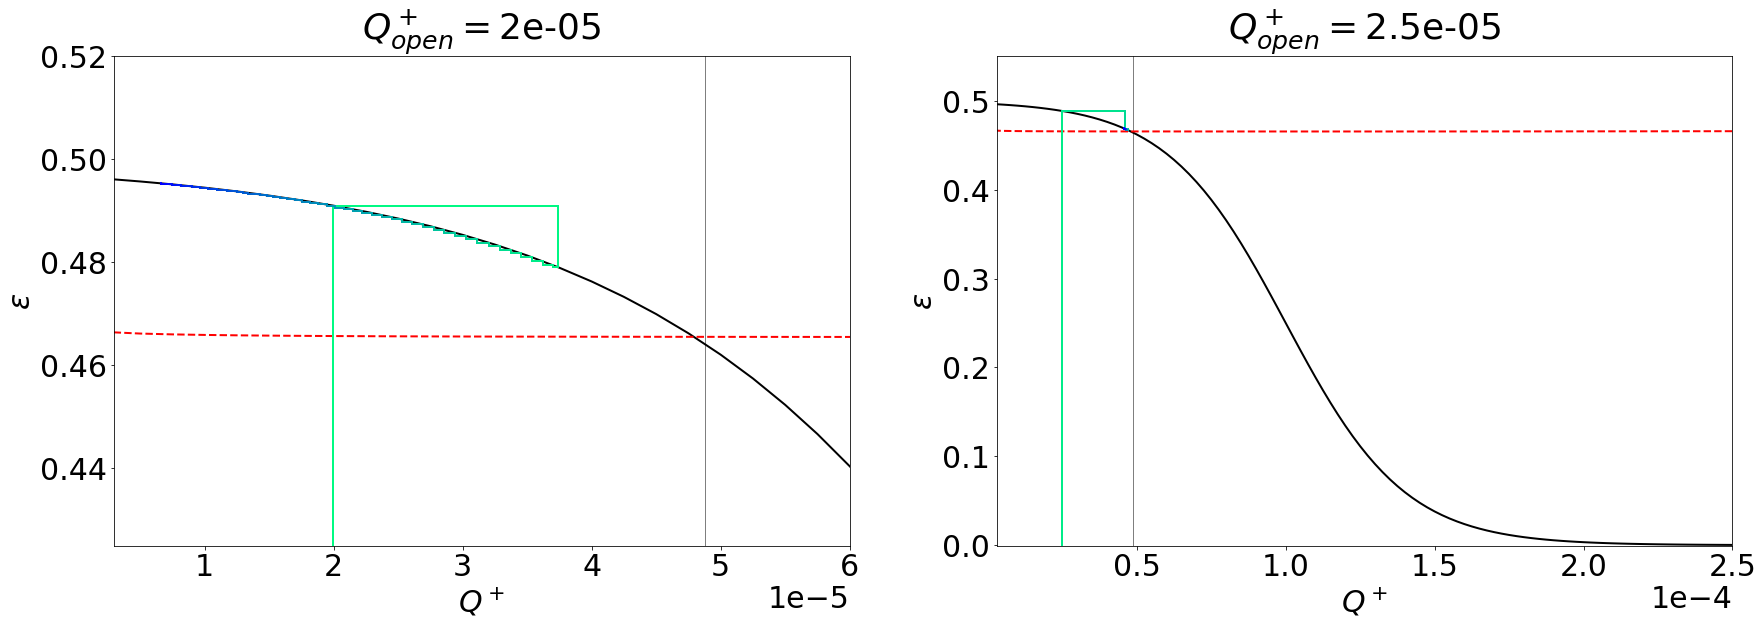

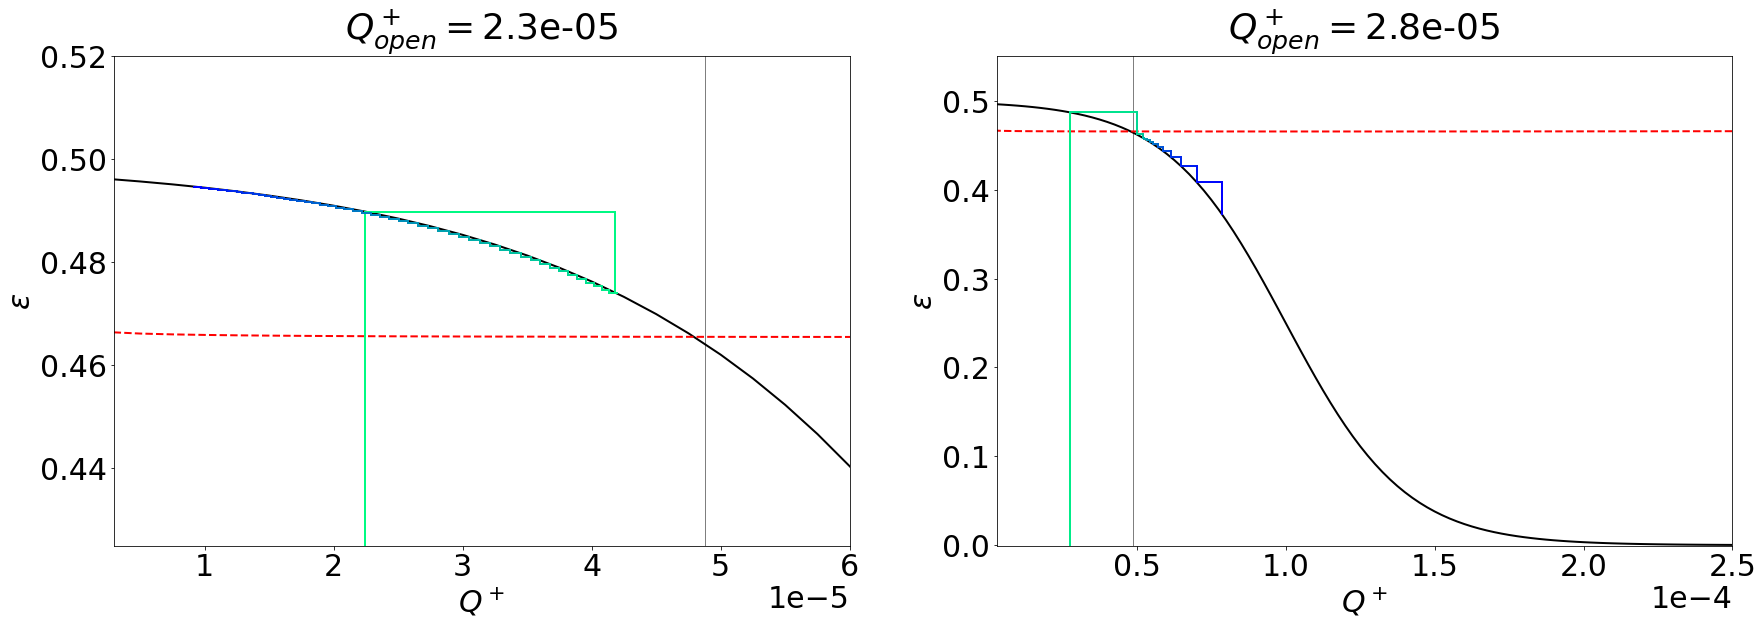

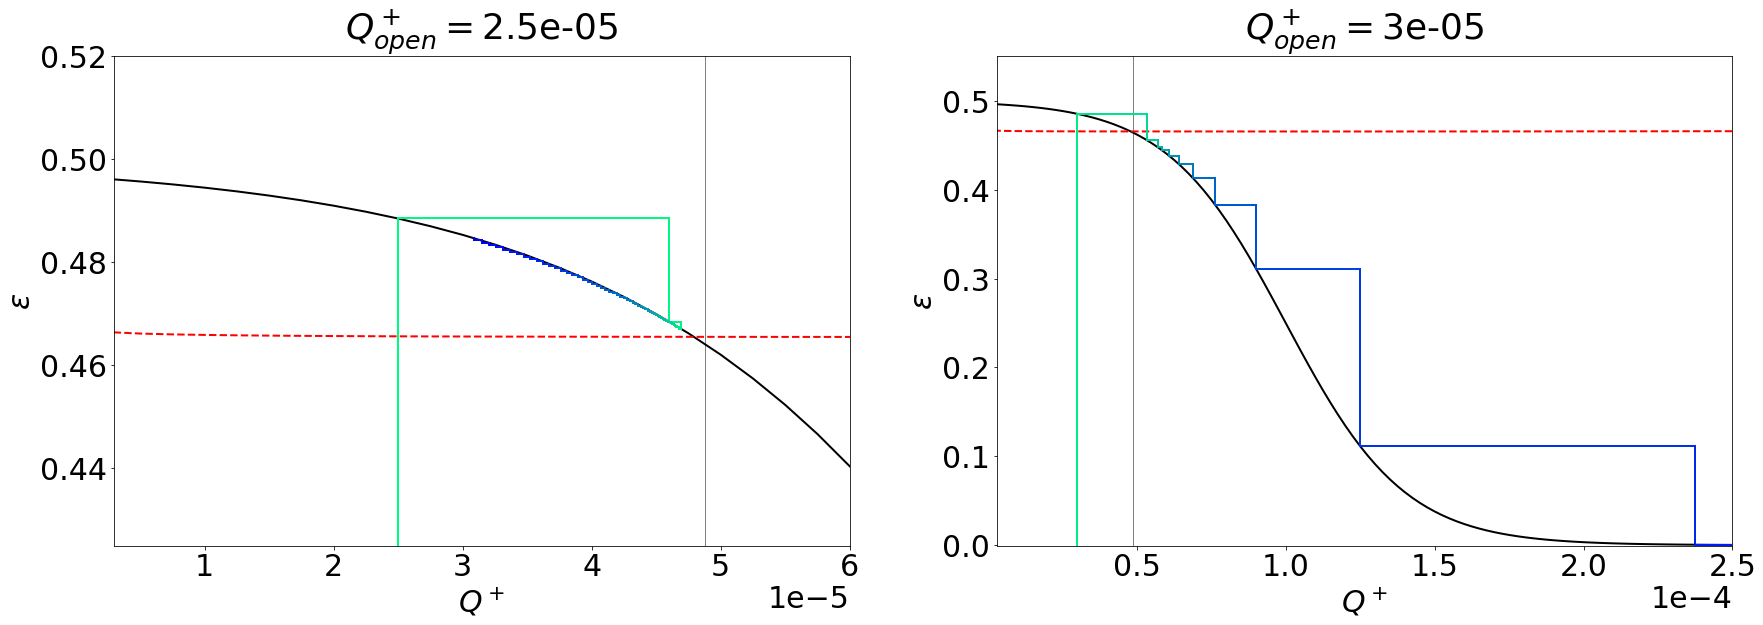

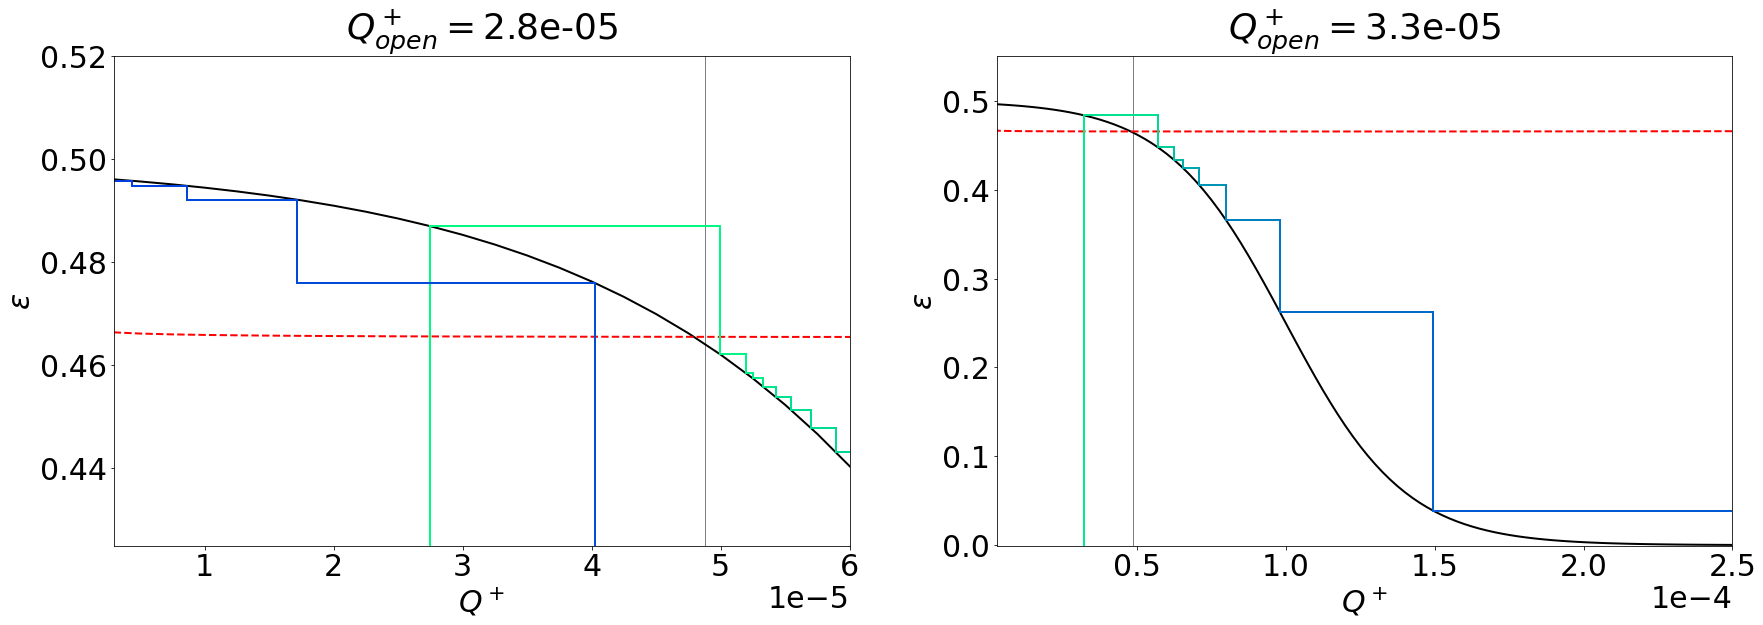

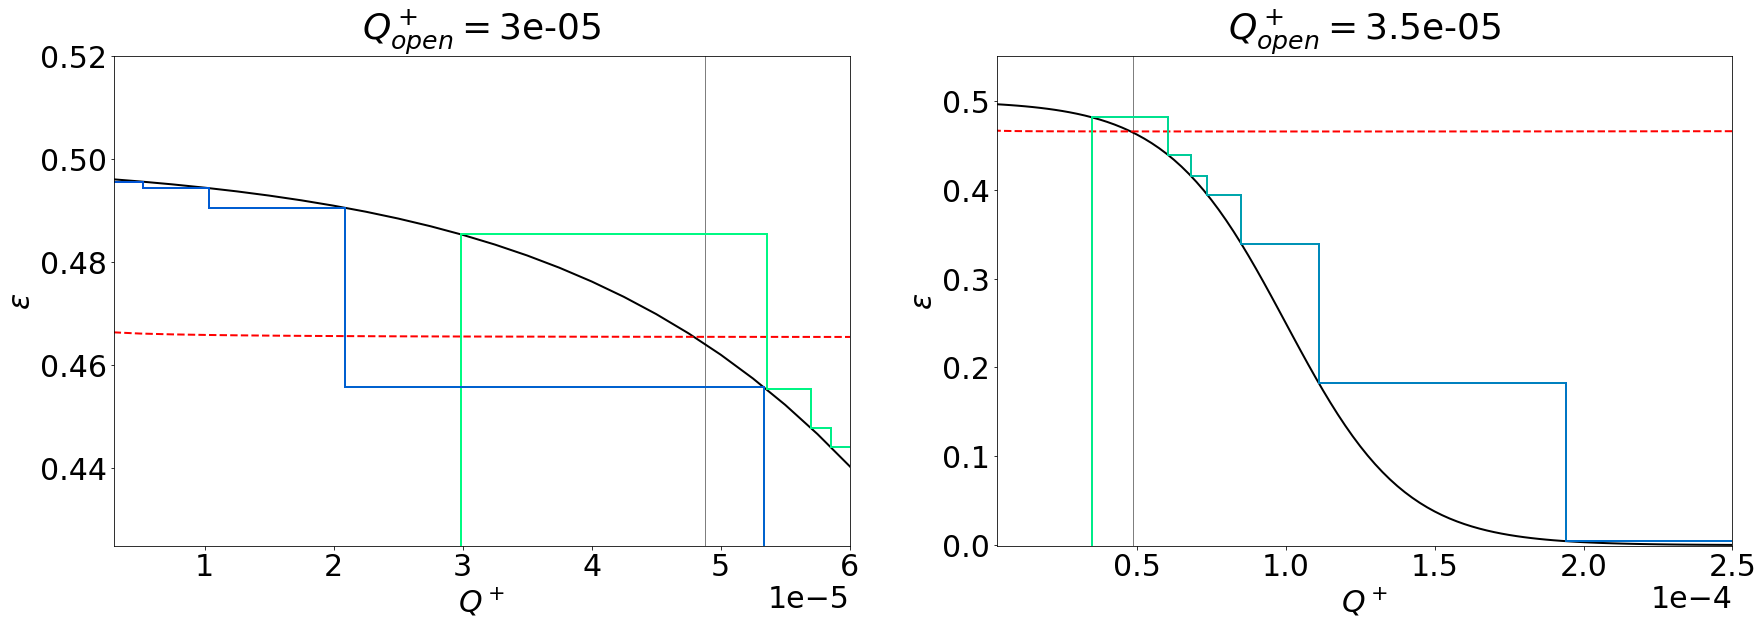

In [80]:

for ii in [i for i in range(1,12)]:
  fig, (ax, ax2) = plt.subplots(1, 2, figsize=(29, 9))
  plt.rcParams.update({'font.size': 30})
  # sns.set_color_codes("pastel")
  # ax.axvline((x5[intersection_idx-2] + x5[intersection_idx-1])/2, c='k')
  ax.axvline((x5[intersection_idx]+x5[intersection_idx2])/2, c='k', linewidth=0.5)
  ax.plot(x5[:-2], y5[:-2], 'k')
  ax.plot(x1, y1, 'r--')
  # ax.set_xlim(0.000003, 0.00025)
  ax.set_ylim(0.425, 0.52)



  test = testis[ii]
  t2 = np.where(test.delta[1:]<test.delta[:-1])[0][0]  + int(5/test.dt)
  t3 = t2 + np.where(test.Qp[t2:]<=test.qpo)[0][0]
  # t3 = np.where(test.delta[1:]>test.delta[:-1])[0][0]  + int(5/test.dt)
  qeep = test.Qp[t3:int(80/test.dt):int(1/test.dt)] #:int(1/test.dt/4)
  # eep = test.epsilon_history[t3:int(t3+20/test.dt):100]
  eep = [0.5*SEIQR.contact_curve(i) for i in qeep]
  eep[1:]=eep[:-1]
  eep[0] = 0
  # qeep[1:]=qeep[:-1]

  side = np.max([0.00025, test.qpo*5*1.1])
  ax.set_xlim(0.000003, 0.00006)#side)
  # ax.fill_between([test.qpo*5, side], 0, 0.6, color='r', alpha=0.4)

  pts = []
  for i in range(len(qeep)-1):
    pts.append((qeep[i], eep[i]))
    pts.append((qeep[i], eep[i+1]))
  pts = np.asarray(pts)#.T

  cm = plt.get_cmap('winter')
  ax.set_prop_cycle(color=np.asarray([cm(1.*i/(pts.shape[0])) for i in range(pts.shape[0]-1)])[::-1])

  # plt.scatter([pts[0][0]], [pts[0][1]], c='r')

  for i in range(pts.shape[0]-1):
      ax.plot(pts[i:i+2].T[0],pts[i:i+2].T[1])
  # ax.plot(pts[0], pts[1])
  ax.set_title('$Q^+_{open} = $'+str(round(test.qpo,6)))


  ax2.axvline((x5[intersection_idx]+x5[intersection_idx2])/2, c='k', linewidth=0.5)
  ax2.plot(x5[:-2], y5[:-2], 'k')
  ax2.plot(x1, y1, 'r--')
  ax2.set_xlim(0.000003, 0.00025)
  ax2.set_ylim(-0.0005, 0.55)
  ax2.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))


  test = testis[ii+2]
  t2 = np.where(test.delta[1:]<test.delta[:-1])[0][0]  + int(5/test.dt)
  t3 = t2 + np.where(test.Qp[t2:]<=test.qpo)[0][0]
  # t3 = np.where(test.delta[1:]>test.delta[:-1])[0][0]  + int(5/test.dt)
  qeep = test.Qp[t3:t3+int(14/test.dt):int(1/test.dt)] #:int(1/test.dt/4)
  # eep = test.epsilon_history[t3:int(t3+20/test.dt):100]
  eep = [0.5*SEIQR.contact_curve(i) for i in qeep]
  eep[1:]=eep[:-1]
  eep[0] = 0
  # qeep[1:]=qeep[:-1]

  side = np.max([0.00025, test.qpo*5*1.1])
  # ax2.set_xlim(0.000003, side)
  # ax2.fill_between([test.qpo*5, side], 0, 0.6, color='r', alpha=0.4)

  pts = []
  for i in range(len(qeep)-1):
    pts.append((qeep[i], eep[i]))
    pts.append((qeep[i], eep[i+1]))
  pts = np.asarray(pts)#.T

  cm = plt.get_cmap('winter')
  ax2.set_prop_cycle(color=np.asarray([cm(1.*i/(pts.shape[0])) for i in range(pts.shape[0]-1)])[::-1])

  # plt.scatter([pts[0][0]], [pts[0][1]], c='r')

  for i in range(pts.shape[0]-1):
      ax2.plot(pts[i:i+2].T[0],pts[i:i+2].T[1])
  # ax.plot(pts[0], pts[1])
  ax2.set_title('$Q^+_{open} = $'+str(round(test.qpo,6)))
  # ax2.xaxis.set_ticks(np.arange(0.00001, 0.00025, 0.0005))
  # ax.xaxis.set_ticks(np.arange(0.00001, 0.00006, 0.0001))
  ax.set_ylabel('$\\epsilon$')
  ax2.set_ylabel('$\\epsilon$')
  ax.set_xlabel('$Q^+$')
  ax2.set_xlabel('$Q^+$')


  fig.show()